# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [2]:
# Read the 'used_device_data.csv' file and save it in the dataframe 'data'
data = pd.read_csv("used_device_data.csv")

## Data Overview

The initial steps to get an overview of the dataset.


*   Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.
*   Get information about the number of rows and columns in the dataset.
*   Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
*   Check the statistical summary of the dataset to get an overview of the numerical columns and categorical columns of the data.


In [3]:
# Display first few rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

In [4]:
# Get the shape of the dataset
data.shape

(3454, 15)

The Used device dataset has 3454 rows and 15 columns.

### Checking the data types of the columns for the dataset

In [5]:
# check the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

There are 3 datatypes in the Used device dataset

*   brand_name, os, 4g, 5g are of type object.
*   screen_size, main_camera_mp, selfie_camera_mp, int_memory,ram,battery,weight,normalized_used_price, mormalized_new_price are of type float64.
*   release_year and days_used are of type int64.


### Statistical summary of the numerical variables

In [6]:
# check the statistical summary of the num variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


### **Observations**


*   The maximum screen size of the used devices is around 30cm and the minimum is around 5cm. The median screen size of the used devices is around 13cm.
*   The main_camera_mp has a maximum value of 48 megapixels.The minimum value is 0.08 megapixels which seems to be too low. The median value is not close to the mean varying around 1.4 megapixels.
*   The selfie_camera_mp has a maximum of 32 megapixels. Less than 75% of the used phones have 8 megapixels selfie camera.  
*   Around 50% of the used devices have an int memory of 32GB. The maximum int memory is around 1TB. The mean and the median value of the RAM is close to 4GB.
*   The minimum capacity of the battery is 500 mAh as compared to the maximum of 9720 mAh. The mean weight of the used devices is around 182 grams against the median value of 160 grams.
*   The dataset has information about the used devices released from 2013 to 2020 and the information about the number of the days the device is used from a minimum of 91 days to a maximum of 1094 days(3 years).
*   The normalized_used_price of the devices has a mean and median value close to 4.3 euros and a maximum price of 6.6 euros.
*   The normalized_new_price of the phones has a mean and median value close to 5 euros and a maximum price of 7.8 euros.



### Statistical summary of the categorical variables

In [7]:
# check the statistical summary of the categorical variables
data.describe(include='object').T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


### **Observations**


*   All the categorical variables have 3454 values hence there are no missing values in the categorical variables.
*   There are data about 34 brands of used devices in the dataset.
*   There are 4 unique operating systems the used devices runs on.
*   The top value of the 4g data availability in the used devices is 'yes' and the 5g data availability is 'no' which infers that most of the used devices in the dataset has 4g data.


### Checking for duplicate values

In [8]:
# check if duplicates present
data.duplicated().sum()

0

There are no duplicate values in the dataset.

### Checking for missing values

In [9]:
# check if missing values present
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are missing values in the used device dataset. The columns/variables with missing values are:
main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight.



Lets check the distribution of the variables to decide how to proceed with correcting the missing values.




In [10]:
# create a new dataframe and copying the original dataframe into it.
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

Lets check the distribution of the numerical variables. The below two functions histogram_boxplot and labeled_barplot are created to perform the EDA.

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(10, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Normalized Used Price

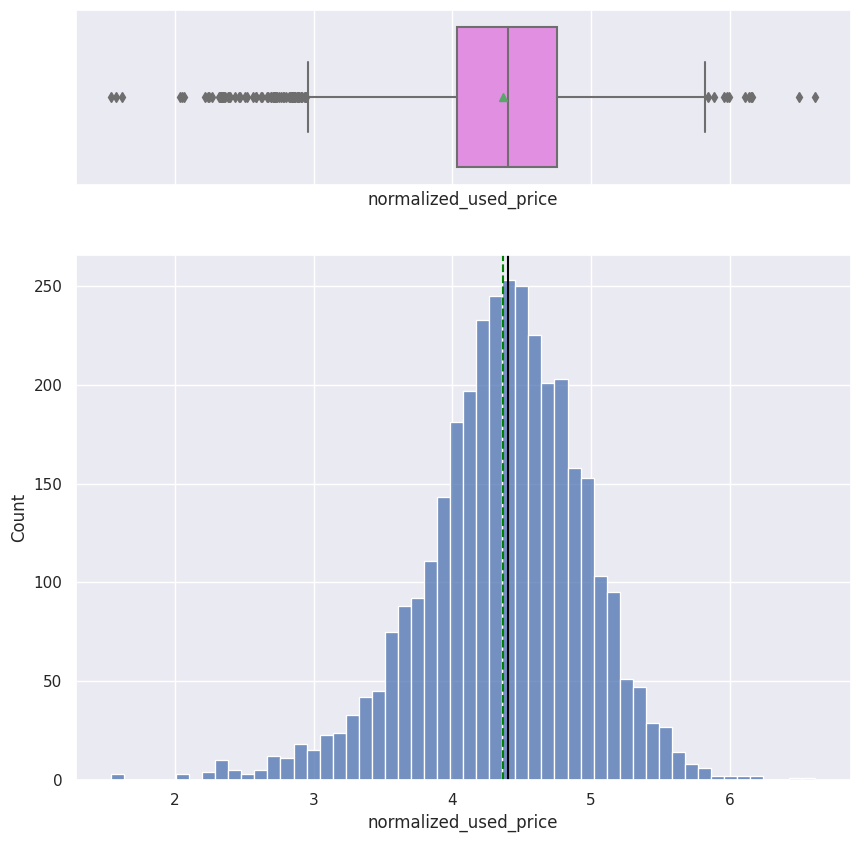

In [13]:
histogram_boxplot(df, "normalized_used_price")

##### **Observations**
*   The distribution of the normalized Used price seems to be normal with few outliers on both sides.
*   The mean and median value of the normalized used price is around 4.3 euros and close to 250 used phones have the price of 4 euros.


#### Normalized New Price

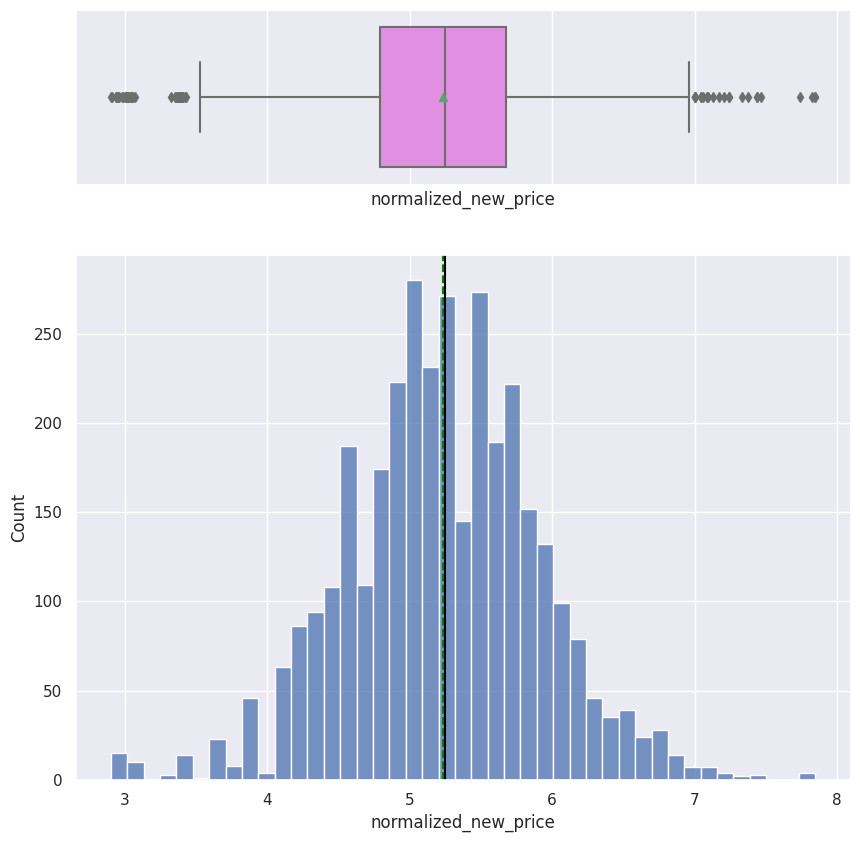

In [14]:
histogram_boxplot(df, "normalized_new_price")

##### **Observations**
*   The distribution seems to be Normal with mean and median value around 5.2 euros.
*   There are few outliers on both sides of the distribution.

#### Screen Size

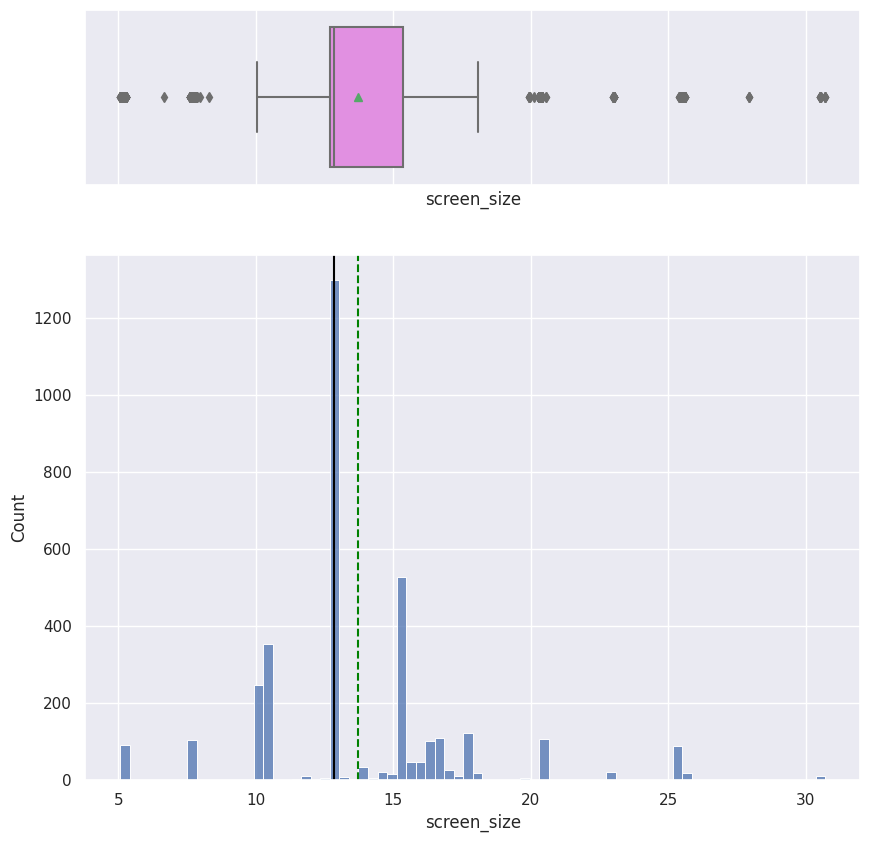

In [15]:
histogram_boxplot(df, "screen_size")

##### **Observations**


*   There are more number of used devices with large screen size hence the distribution seems to be right skewed.
*   Less than 25% of the devices have screen size of 12cm.
*   Around 500 devices have larger screen size of 15cm.





#### Main Camera mp

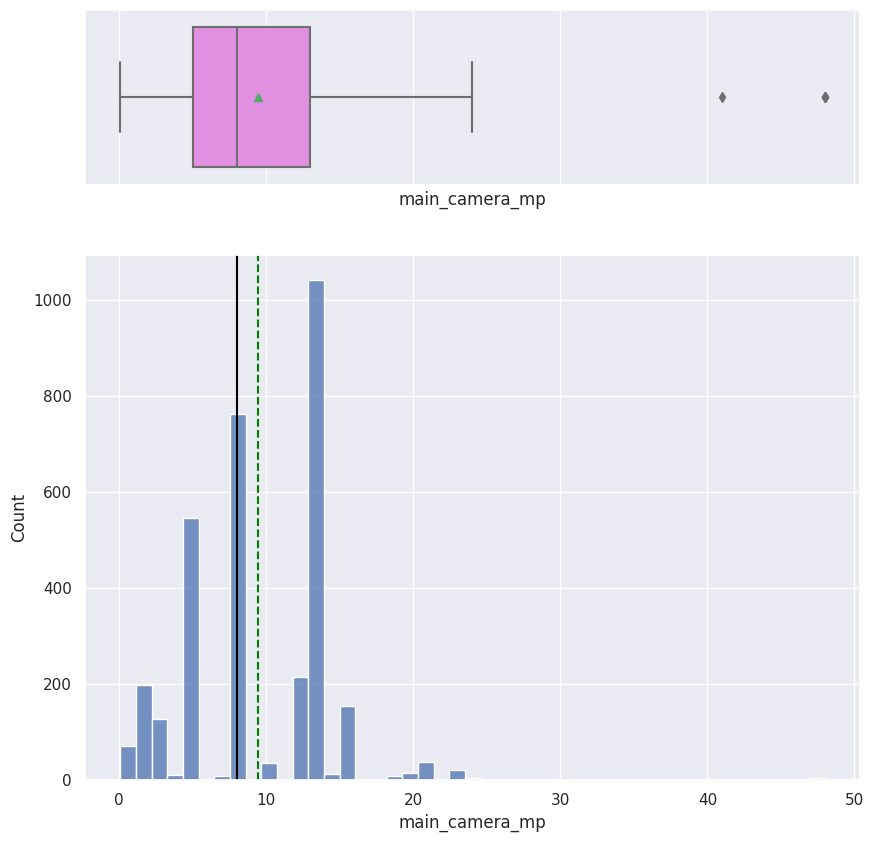

In [16]:
histogram_boxplot(df, "main_camera_mp")

##### **Observations**
*   The mean value of the main camera is around 10 megapixels.
*   Less than 75% of the used devices have main camera resolution of 13 megapixels and the number of used devices with 13mp is around 1100.
*   There are few used devices with more than 20 megapixels main camera and some outliers which shows there are few used devices with 48 megapixels main camera.


#### Selfie Camera mp

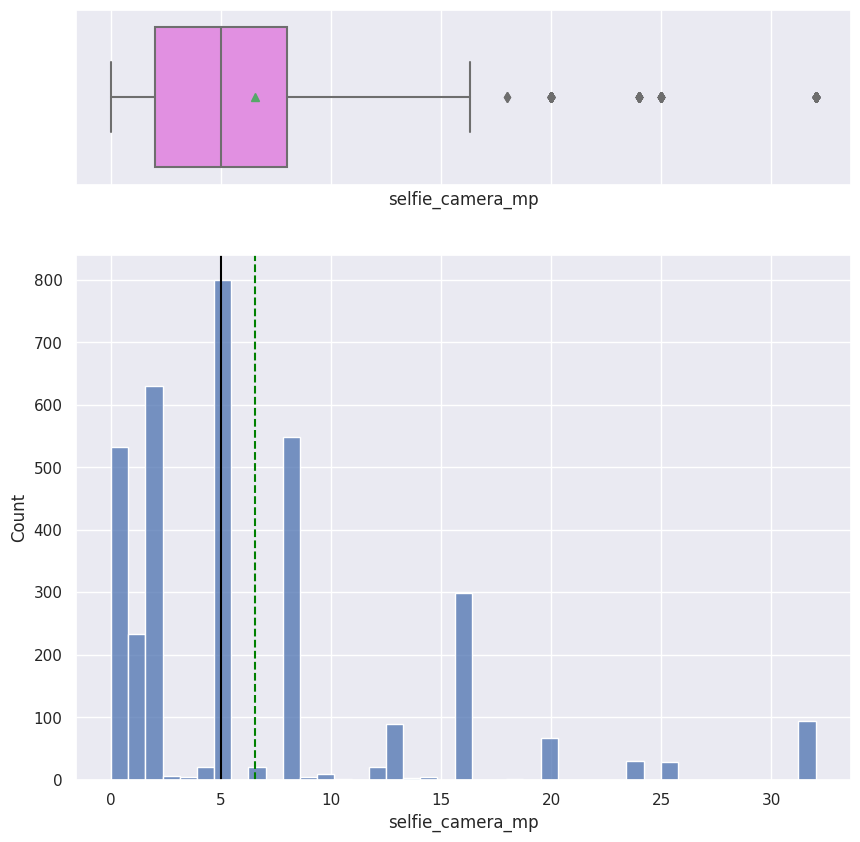

In [17]:
histogram_boxplot(df, "selfie_camera_mp")

##### **Observations**
*   The distribution of the selfie camera seems to be right skewed.There are around 520 used devices with zero megapixels selfie camera means there is no selfie camera.
*   Around 1100 devices have a selfie camera of more than 8 megapixels which is ideal for the current trend with more selfie lovers.
*   There are few ouliers with 32 megapixels selfie camera.

#### Internal Memory

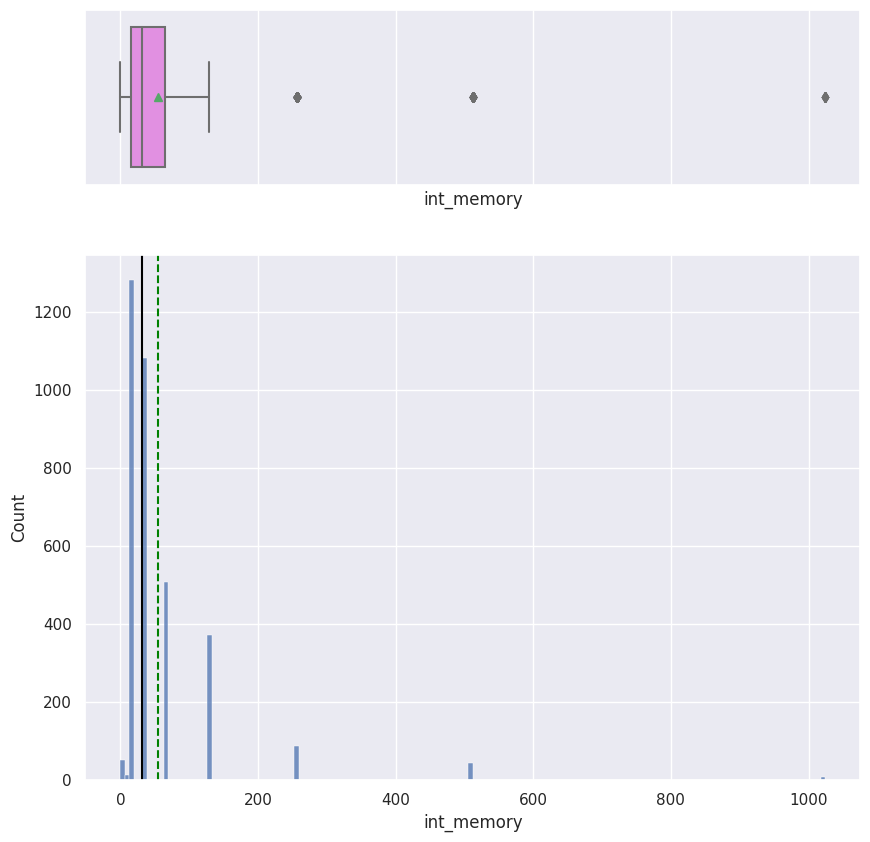

In [18]:
histogram_boxplot(df, "int_memory")

##### **Observations**

*   The mean value of the Internal memory is close to the 75% percentile which infers that close to 2600 used devices have internal memory of less than 60GB.
*   There are few outliers with used devices having 1TB internal memory.



#### RAM

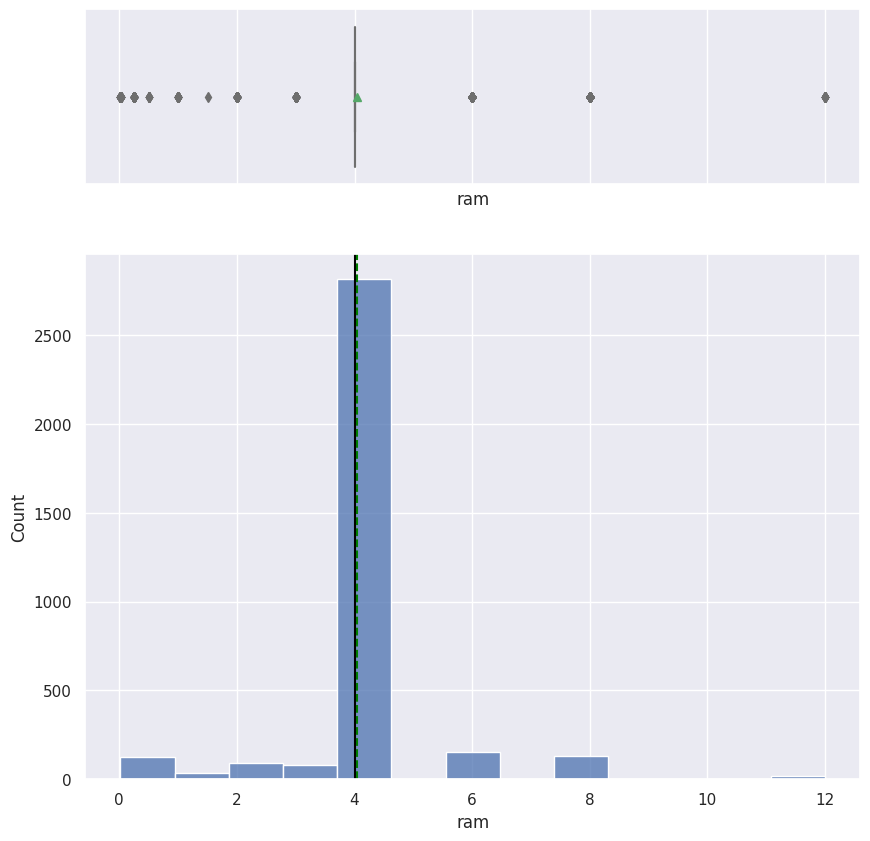

In [19]:
histogram_boxplot(df, "ram")

##### **Observations**
*   Around 2800 used devices have a ram capacity of 4GB.
*   The mean, median, 25%, 75% values are all same around 4GB which suggets that close to 85% of the data have values of RAM less than 4GB.
*   There are few outliers in the distribution on both sides.



#### Battery

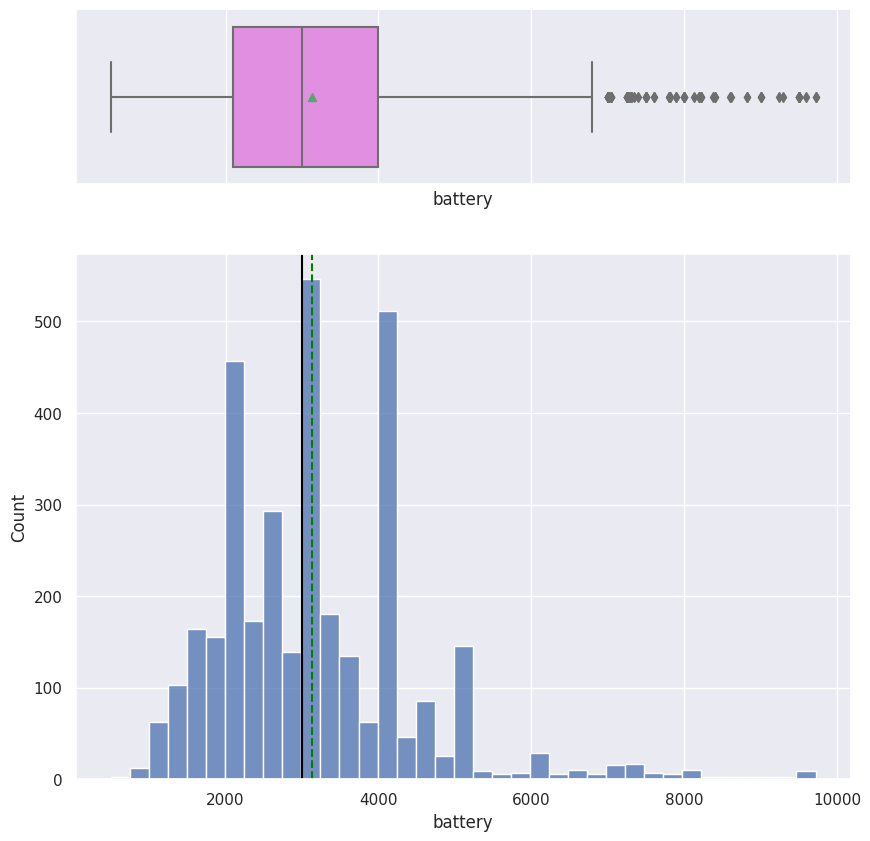

In [20]:
histogram_boxplot(df, "battery")

##### **Observations**
*   The distribution of the battery capacity seems to be highly right skewed.
*   There are outliers in the distribution that suggets that there are few used devices with more than 6500 mAh battery capacity.
*   The mean and the median values are almost close to each other. Less than 50% of the used devices have battery capacity of 3000 mAh.


#### Weight

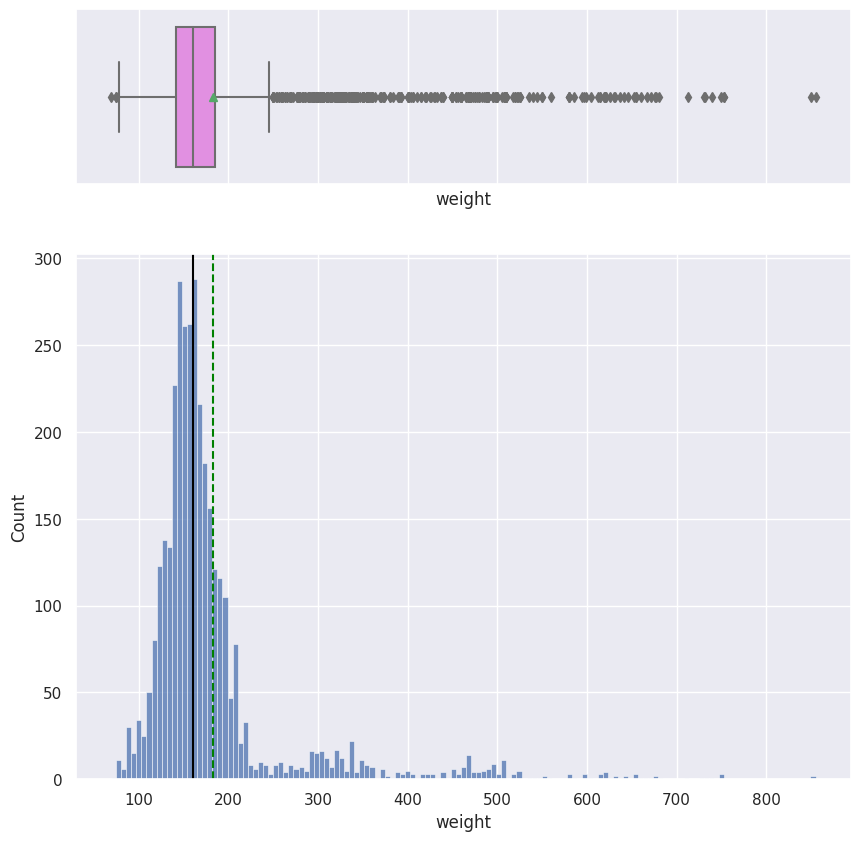

In [21]:
histogram_boxplot(df, "weight")

##### **Observations**
*   The mean value and the 75% value of the weight distribution is same. Hence it suggests that 75% of the used devices have weight less than around 180 grams.
*   There are large number of outliers in the distribution of weight which infers that there are more number of used devices with heavier weight.



#### Days Used

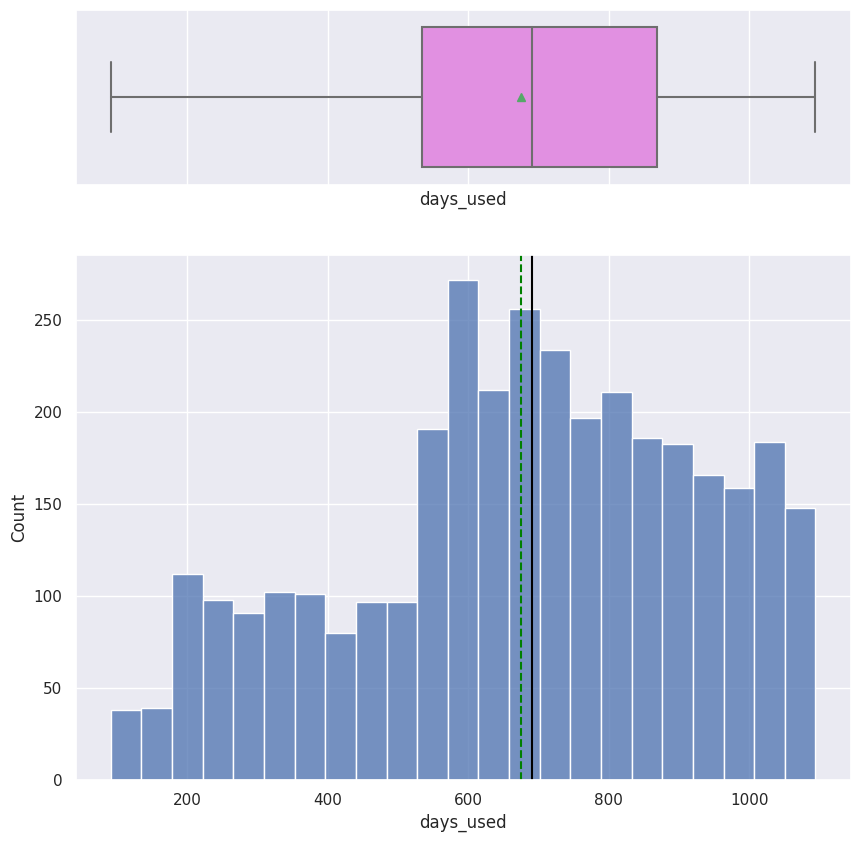

In [22]:
histogram_boxplot(df, "days_used")

##### **Observations**

*   The distribution of days used seems to be left skewed.
*   Around 75% of the used devices have been used for less than 860 days.


#### Release Year

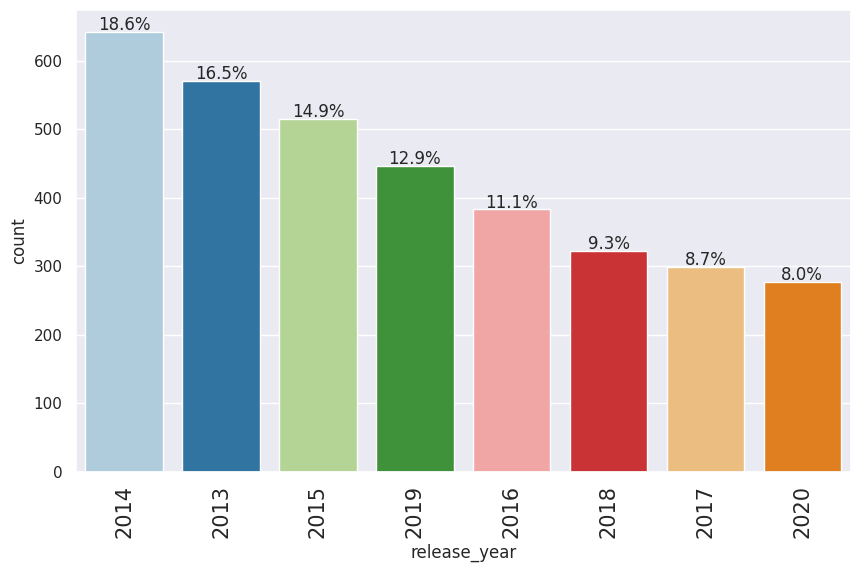

In [23]:
labeled_barplot(df, "release_year", perc=True)

##### **Observations**
*   From the above visualization we can conclude that around 18.6% of the used devices which is close to 650 have been released in the year 2014. Around 8%(280 number of used devices) have released in the year 2020.
*   Around 70% of the used devices have been released before 2017.

#### Brand Name

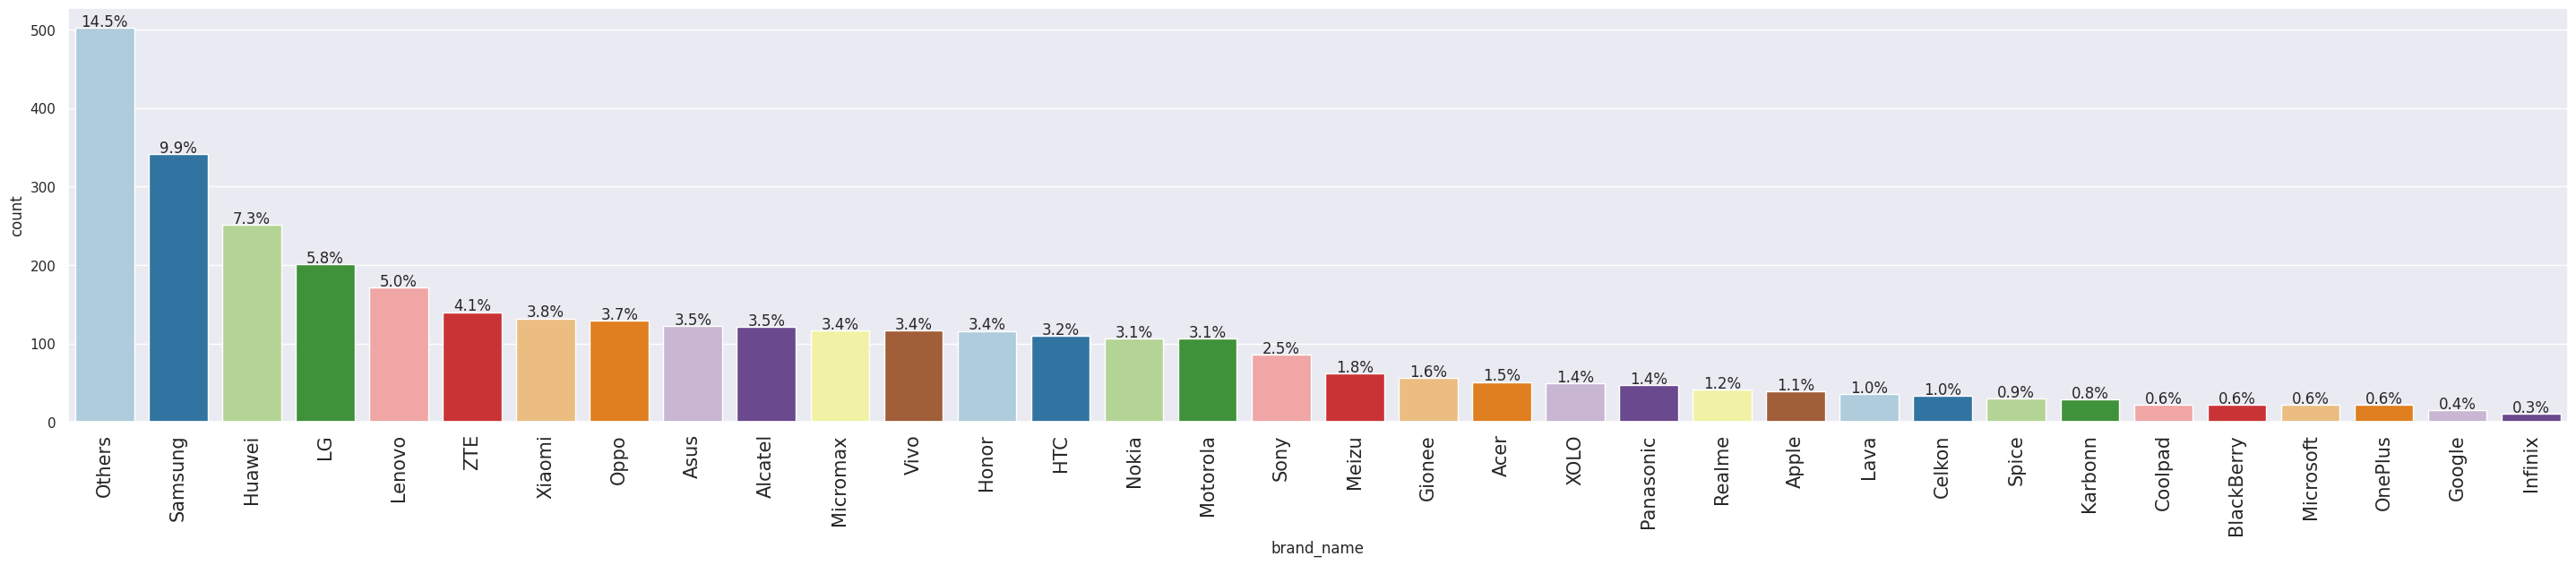

In [24]:
labeled_barplot(df, "brand_name", perc=True)

##### **Observations**
*   The Samsung brand takes about 10% of the data in the used device dataset means there are about details of 345 samsung used devices.
*   The third highest brand is Huawei and it has 7.3% data meaning there are details of 252 Huawei devices.
*   Infinix brand has least percentage of 0.3% data available.
*   There are some brands which is termed as 'Other' category and it takes about 14.5% of used device data.

#### Operating System

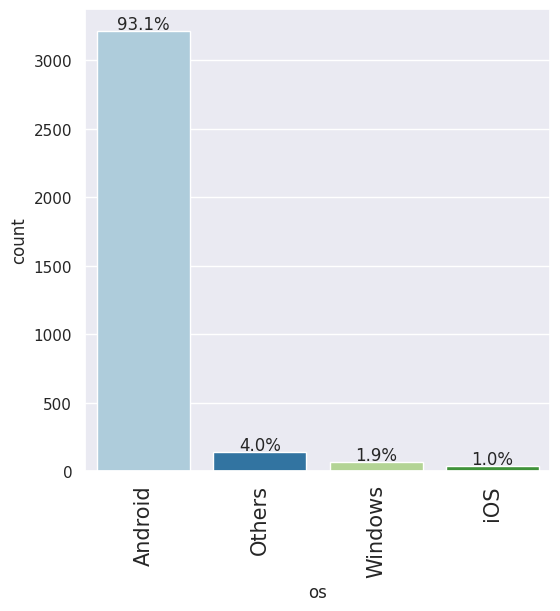

In [25]:
labeled_barplot(df, "os", perc=True)

##### **Observations**
*   Around 93% of used devices runs on Android OS.
*   The Windows runs on 1.9% devices meaning around 64 devices in the used devices dataset.
*   The least percentage/ around 34 devices runs on ios.


#### 4g

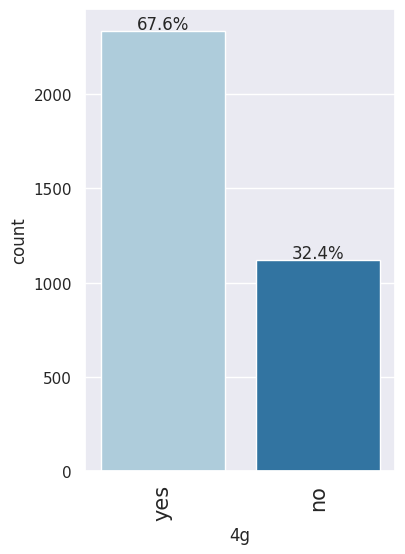

In [26]:
labeled_barplot(df, "4g", perc=True)

##### **Observations**
*   4g data is available in 67.6% of the used devices (Around 2334 devices in the dataset).
*   Around 1119 used devices (32.4%) doesnt have 4g data.

#### 5g

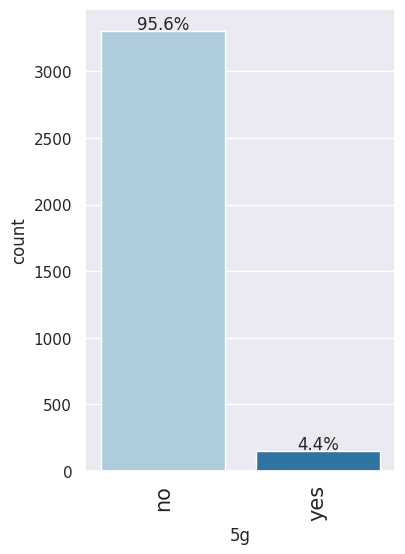

In [27]:
labeled_barplot(df, "5g", perc=True)

##### **Observations**
*   Almost 95% of used devices doesnt support 5g data availability.
*   Fewer than 4.4% of used devices has 5g data available.

### Bivariate Analysis

#### Brand vs RAM

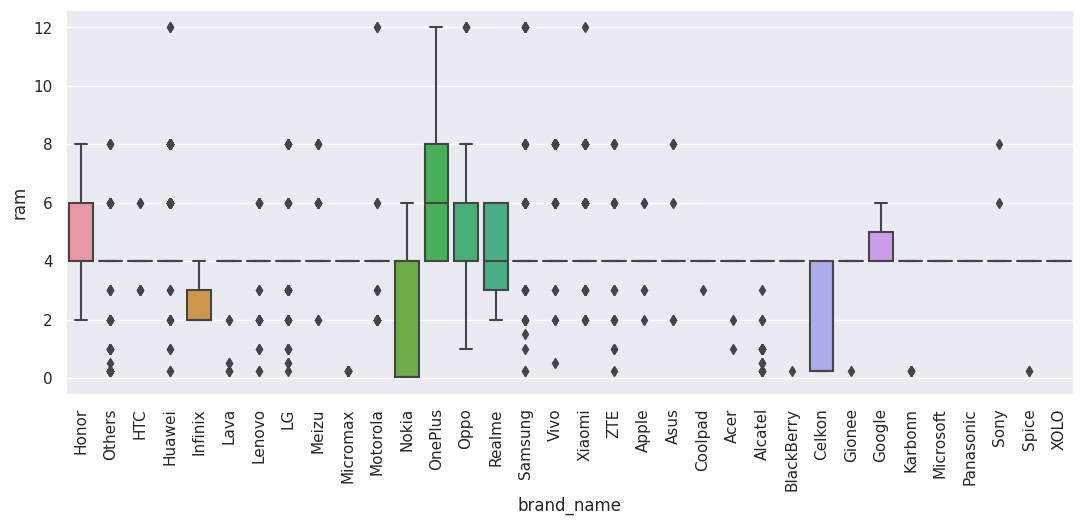

In [28]:
# Visualize the relationship berween Brand and RAM using box plot
plt.figure(figsize=(13,5))
sns.boxplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()

##### **Observations**

*   The RAM speed is almost 4 GB for most of the devices of the brands HTC, Huawei, Lava, Lenovo, LG, Meizu, Micromax, Motorola, Samsung, Vivo, xiaomi, ZTE, Apple, Asus, Coolpad, Acer, Acatel, Blackberry, Gionne, Karbonn, Microsoft, Panasonic, Sony, Spice and XOLO. There are some devices of the brands Huawei, Micromax, Samsung and Xiaomi has 12GB of ram.
*   Oneplus devices has the highest ram capacity with minimum of 4GB to a maximum of 12 GB.
*   Nokia and celkon devices has the lowest ram capacity. Almost 75% of the Nokia devices has less than 4GB ram. All the Celkon devices has less than 4GB of ram.
*   Honor and Oppo devices have almost the same level of ram capacity. They offer upto 8GB of ram.

#### Battery vs Brand (Corresponding Weight)

Lets check how the large batteries of the devices impact their weight. Devices with larger batteries runs for a long time at the same time it takes more weight.

In [29]:
# find the number of devices having large batteries
large_battery = df[df['battery'] > 4500]
large_battery.shape

(341, 15)

There are 341 devices that has batteries more than 4500 mAh. Lets plot the distribution of the brands for these larger battery segment and their corresponding weight factor.

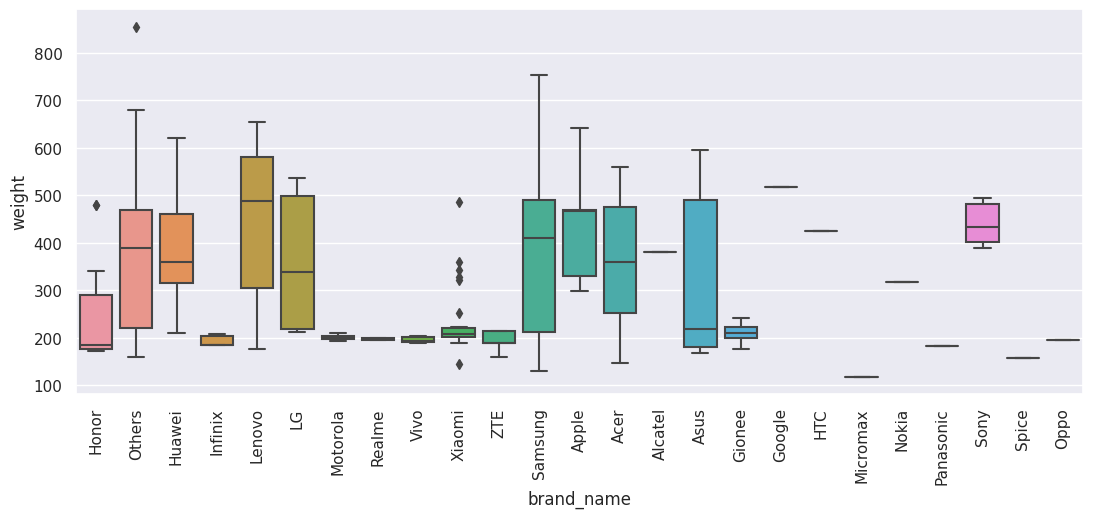

In [30]:
# Visualize the relationship berween Brand and weight for large batteries using box plot
plt.figure(figsize=(13,5))
sns.boxplot(data=large_battery,x='brand_name',y='weight')
plt.xticks(rotation=90)
plt.show()

##### **Observations**
*   The median weight of samsung devices with larger batteries is around 420 grams. The heaviest samsung device is of about 760 grams.
*   The devices of the brands infinix, Motorola, Realme, Vivo, Xiaomi, ZTE have managed to reduce the weight of their devices to around 220 grams even with larger batteries.
*   The brands which managed to reduce the weight extremely well to under 200 grams even with larger batteries are Micromax, Panasonic, Spice and Oppo with micromax being the best. Google and HTC have devices with weight 600 and 500 grams respectively.
*   Sony devices have a weight between 380 to 480 grams for larger battery segment.

#### Brand vs Screen size

Devices with Bigger screen size offer better viewing. Lets check how many devices of each brand in the given dataset have screen size larger than 6 inches.

In [31]:
# Devices with big screen size (conversion of 6 inches to cm to compare with variable screen_size)
big_screensz = df[df['screen_size']>(6*2.54)]
big_screensz.shape

(1099, 15)

In [32]:
# check value counts of brands with large screen size
big_screensz['brand_name'].value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

There are 1099 devices with screen size larger than 6 inches. Lets visualize the distribution of the brands offering these bigger screen devices.

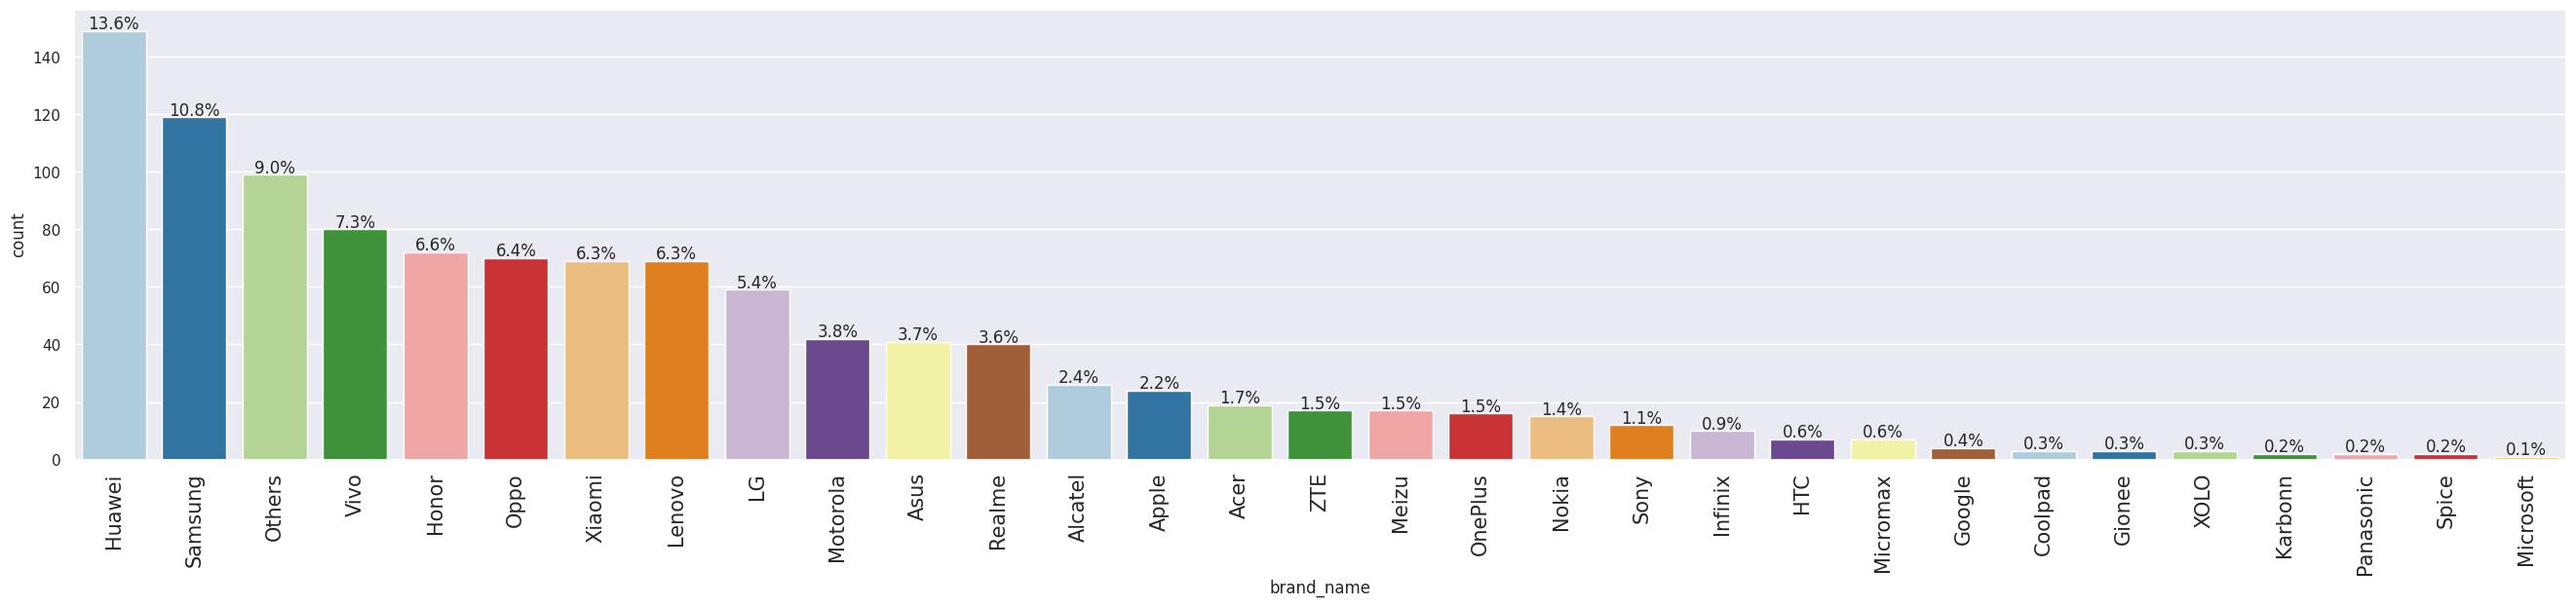

In [33]:
# visualize using labeled barplot
labeled_barplot(big_screensz, "brand_name", perc=True)

##### **Observations**
*   Out of the 1099 devices offering bigger screen size (more than 6 inches)13.6% are of brand Huawei and it takes the highest percentage of devices.
*   The second highest is Samsung. Aroung 110 devices of samsung have more than 6 inches screen. Vivo devices taking the third highest of 7.3%
*   The brands Oppo, Xiaomi, Lenovo, Honor have around 65 devices each with bigger screen.
*   Very few number of devices of brands Google, HTC, Micromax, Gionne, XOLO, Karbonn, Panasonic,Spice and Microsoft have big screen.

#### Brand Vs Selfie camera resolution

Lets check the brands offering selfie camera more than 8mp resolution as high reolution selfie camera attracts more customers.

In [34]:
# Creating a dataframe with selfie camera more than 8mp
high_selfiecam = df[df['selfie_camera_mp']>8]
high_selfiecam.shape

(655, 15)

In [35]:
# check value counts of brands with high selfie camera
high_selfiecam['brand_name'].value_counts()

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64

There are 655 devices with Selfie camera more than 8mp.

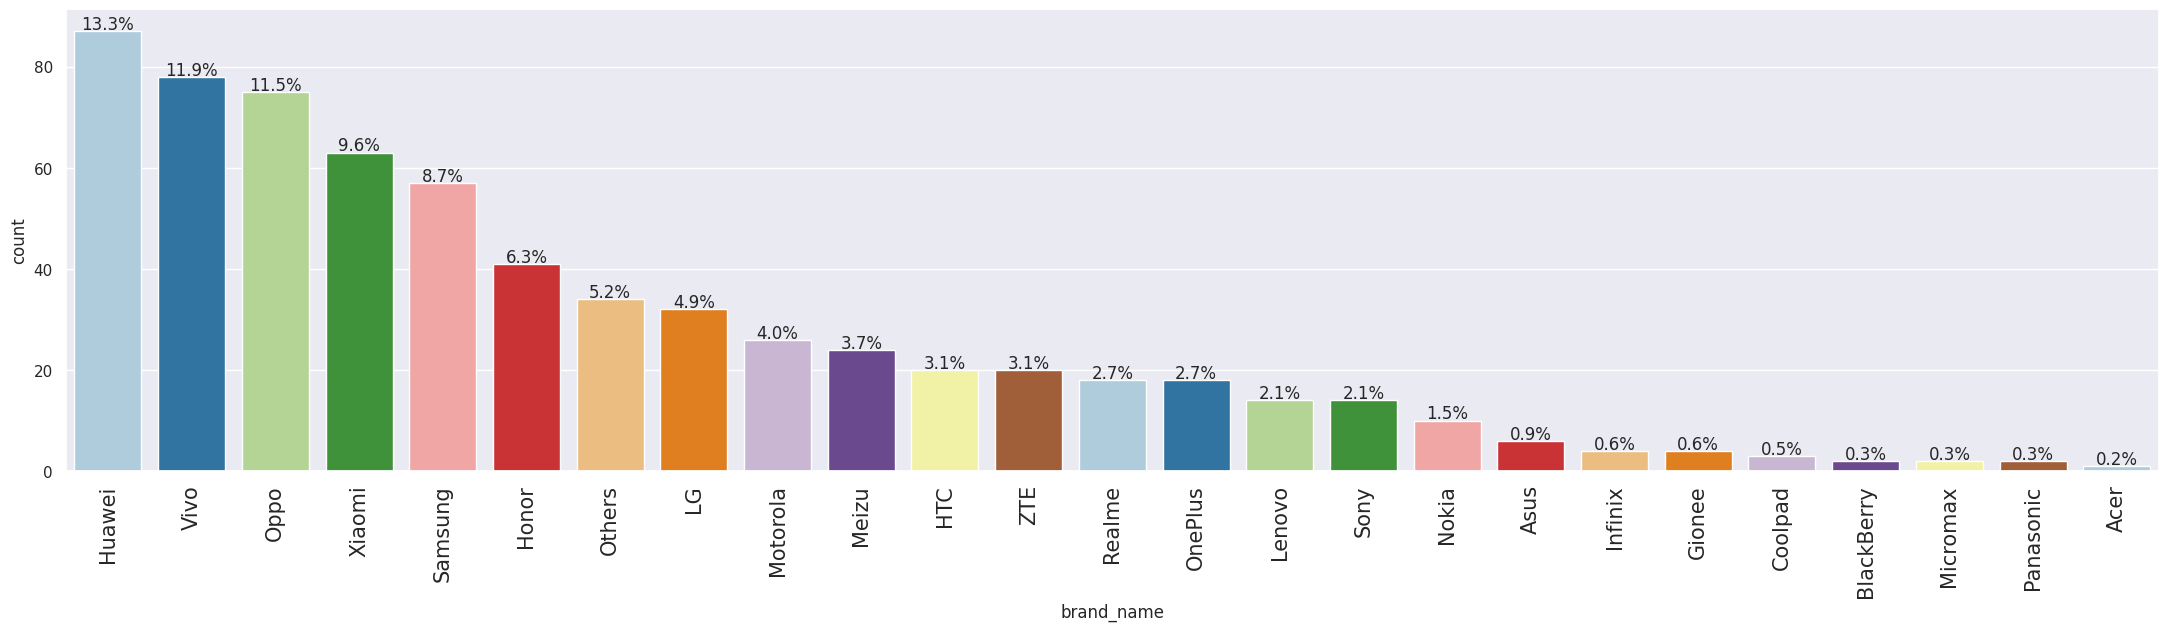

In [36]:
# Visualize the high resolution selfie camera using labeled barplot
labeled_barplot(high_selfiecam, "brand_name", perc=True)

##### **Observations**
*   The Huawei brand has the highest selfie camera resolution among other brands contributing to 13.6% of 655 devices followed by Vivo and Oppo.
*   Samsung and Xiaomi has decent number of devices with high selfie camera resolution. The least number of devices with high resolution selfie camera is of brand Acer.



#### Brand Vs Main camera resolution

Lets check the brands offering high main camera resolution. Most brands offer a maximum of 16mp main camera. Lets set 16mp as threshold and compare the brands offering more than 16mp.

In [37]:
# Creating a dataframe with main camera more than 16mp
high_maincam = df[df['main_camera_mp']>16]
high_maincam.shape

(94, 15)

In [38]:
# check the value counts of brands with high main camera
high_maincam['brand_name'].value_counts()

Sony          37
Motorola      11
Others         9
HTC            6
ZTE            5
Meizu          5
Nokia          4
Microsoft      4
Asus           3
BlackBerry     2
Samsung        2
Panasonic      1
Lenovo         1
Acer           1
Honor          1
Gionee         1
Xiaomi         1
Name: brand_name, dtype: int64

There are 94 devices with main camera more than 16mp.

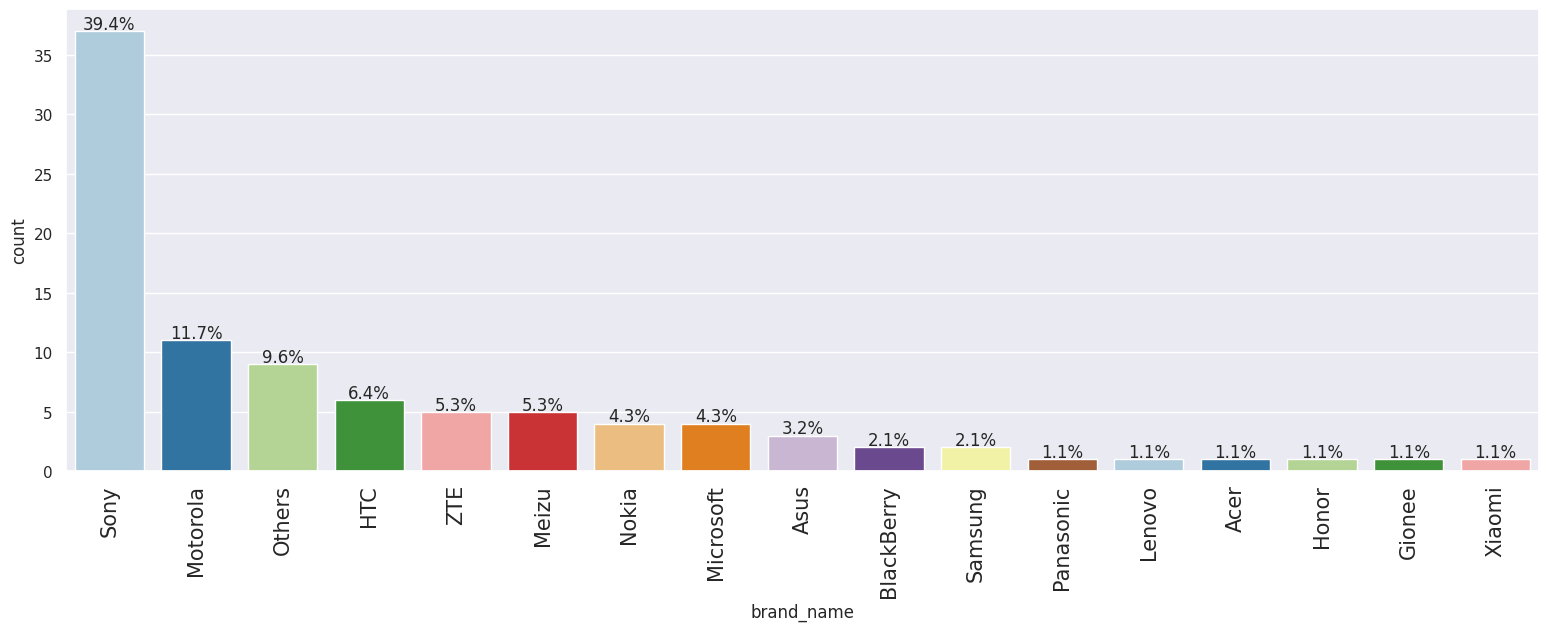

In [39]:
# Visualize the high resolution main camera using labeled barplot
labeled_barplot(high_maincam, "brand_name", perc=True)

##### **Observations**
*   The Sony brand has the highest among all brands contributing to 39.4% of 94 high resolution main camera devices followed by Motorola.
*   The least number of devices with high resolution main camera is of brand Xiaomi, Gionee,Honor,Acer,Lenovo and Panasonic.



#### 4g and 5g vs Used Price

Lets check the number of devices supporting 4g and 5g data as well as the impact of the used device price based on 4g and 5g availability.

In [40]:
# check the value counts of the brands with 4g
df_4g_yes = df[df['4g']=='yes']
print("The Number of used devices supporting 4g data:",df_4g_yes['brand_name'].value_counts().sum())
df_4g_yes['brand_name'].unique()

The Number of used devices supporting 4g data: 2335


array(['Honor', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo', 'LG',
       'Meizu', 'Motorola', 'Nokia', 'OnePlus', 'Oppo', 'Others',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Coolpad',
       'Alcatel', 'Acer', 'Asus', 'BlackBerry', 'Gionee', 'Google',
       'Micromax', 'Microsoft', 'Panasonic', 'Sony', 'XOLO'], dtype=object)

In [41]:
# check the value counts of the brands without 4g
df_4g_no = df[df['4g']=='no']
print("The Number of used devices not supporting 4g data:",df_4g_no['brand_name'].value_counts().sum())
df_4g_no['brand_name'].unique()

The Number of used devices not supporting 4g data: 1119


array(['Others', 'Huawei', 'Lava', 'Lenovo', 'LG', 'Micromax', 'Nokia',
       'Vivo', 'ZTE', 'Asus', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon',
       'Gionee', 'Google', 'Honor', 'HTC', 'Karbonn', 'Meizu',
       'Microsoft', 'Motorola', 'Oppo', 'Panasonic', 'Samsung', 'Sony',
       'Spice', 'Xiaomi', 'XOLO'], dtype=object)

In [42]:
# check the value counts of the brands with 5g
df_5g_yes = df[df['5g']=='yes']
print("The Number of used devices supporting 5g data:",df_5g_yes['brand_name'].value_counts().sum())
df_5g_yes['brand_name'].unique()

The Number of used devices supporting 5g data: 152


array(['Honor', 'Huawei', 'Lenovo', 'LG', 'Meizu', 'Motorola', 'Nokia',
       'OnePlus', 'Oppo', 'Others', 'Vivo', 'Xiaomi', 'ZTE', 'Samsung',
       'Coolpad', 'Realme', 'Sony'], dtype=object)

In [43]:
# check the value counts of the brands without 5g
df_5g_no = df[df['5g']=='no']
print("The Number of used devices not supporting 5g data:",df_5g_no['brand_name'].value_counts().sum())
df_5g_no['brand_name'].unique()

The Number of used devices not supporting 5g data: 3302


array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'Oppo', 'Realme',
       'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus', 'Coolpad',
       'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee', 'Google',
       'Karbonn', 'Microsoft', 'OnePlus', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

##### **Observations**
*   The 4g data is available in 2335 devices and not available in 1119 devices.
*   The 5g data is available in only 152 devices. The remaining 3302 devices does not support 5g.
*   Overall the used device data has more number of devices with 4g availability compared to 5g.






**Lets check the impact of used device price based on the availability of 4g and 5g.**

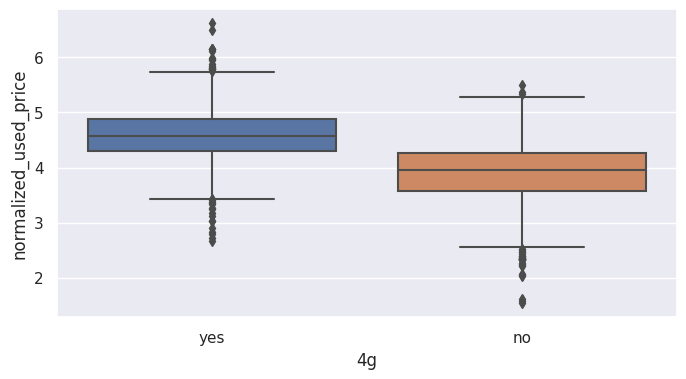

In [44]:
# Visualize relationship of 4g vs used price using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="4g", y="normalized_used_price")
plt.show()

##### **Observations**
*   The median used price value if 4g data is available is 4.5 euros compared to a median used price of 4 euros if 4g not available.
*   There are some devices which are sold for a higher price of around 7 euros if 4g is available whereas the higher value is only 5.3 euros for devices with no 4g.
*   There are some used devices which are sold for less than 2 euros if 4g is not available.

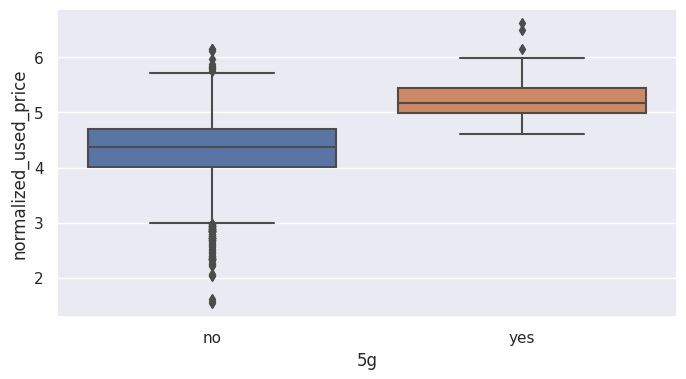

In [45]:
# Visualize relationship of 5g vs used price using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="5g", y="normalized_used_price")
plt.show()

##### **Observations**
*   50% of used devices are sold for less than 4.5 euros if 5g is not available. There are more number of devices sold for less than 3 euros in case of 5g unavailability.
*   The median used price is around 5.3 euros if 5g is available. There are quite a few devices which are sold for even 7 euros in case of 5g availability.



#### Normalized used Price vs Release year

Lets check how the used device price varies across years.

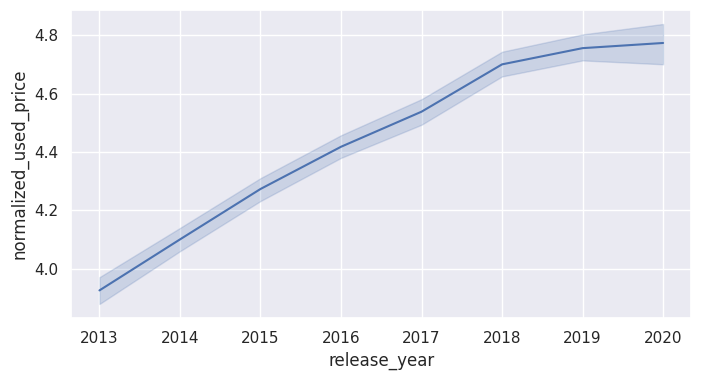

In [46]:
# Visualize the relationship of used price vs release year using line plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=df,x = 'release_year' , y = 'normalized_used_price')
plt.show();

##### **Observations**
The used price value sharply increases from release years 2013 to 2018 and then there is a slightly steady increase from 2018 to 2020. It infers that the customers who buys used devices which are three years old might not see a huge change in price. Overall the number of years since the device has been released plays a important role in determining the price.


#### Correlation Matrix

In [47]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# remove release_year
num_cols.remove("release_year")

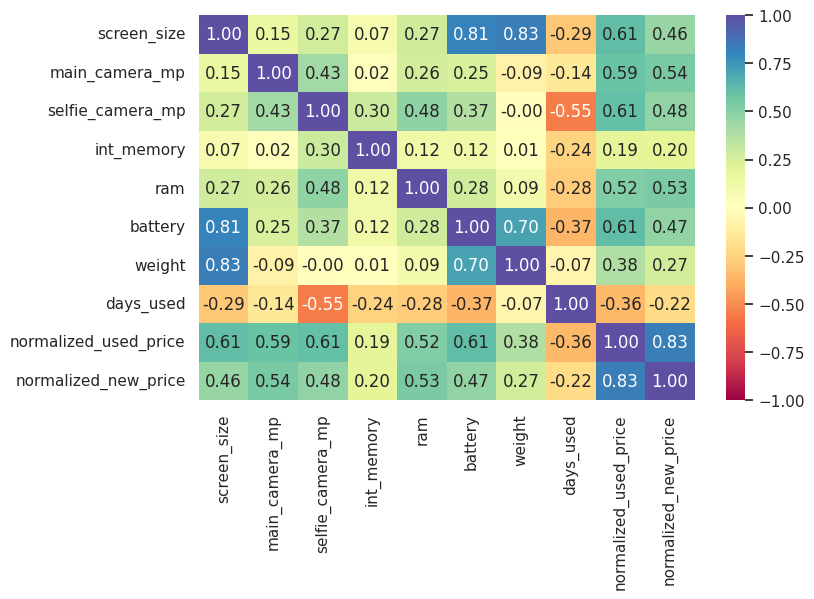

In [48]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##### **Observations**
*   The variable normalized_used_price is postively correlated with screen_size, main_camera_mp, selfie_camera_mp,ram,battery and weight. The used price is negatively correlated with number of days used. It suggests that these variables play an important role in determining the price of the used devices. Also there is a very high positive correlation between used price and new price.
*   The variables battery and weight has high positive correlation with each other. It infers that the used devices having large battery capacity are heavier.
*   The variables screen_size and weight has very high positive correlation with each other meaning the devices with larger screen size are heavier.
*   The variables battery and screen size also have high positive correlation with each other meaning the devices that has larger screen size needs more battery capacity.
*   The variables selfie camera mp and days used are negatively correlated with each other. It suggests that phones that are used for more days ie., the devices released early in the years of 2013 to 2017 may have been configured with very less selfie camera megapixels.

### **EDA Summary of Observations**
*   The distribution of normalized used price is almost a normal distribution with few outliers.
*   Around 93% of used devices runs on Android OS.
*   The RAM speed is almost 4 GB for most of the brands. Oneplus brand performs exceptionally well with respect to RAM having a median capacity of 6GB. Nokia and Celkon have less than 4GB of RAM.
*   The brands which managed to reduce the weight extremely well to under 200 grams even with larger batteries(more than 4500mAh) are Micromax, Panasonic, Spice and Oppo with micromax being the best. Samsung and Sony have a median weight of 420 grams for larger batteries.
*   There are 1099 devices across different brands with screen size larger than 6 inches.
*   There are 655 devices with Selfie camera more than 8mp. The Huawei brand has the highest selfie camera resolution among other brands contributing to 13.6% of 655 devices followed by Vivo and Oppo and the least being acer.
*   The variable normalized_used_price is postively correlated with screen_size, main_camera_mp, selfie_camera_mp,ram,battery and weight whereas it is negatively correlated with number of days used. It suggests that these variables play an important role in determining the price of the used devices.
*   The used price value sharply increases from release years 2013 to 2018 and then there is a slightly steady increase from 2018 to 2020.
*   Overall the used device data has more number of devices with 4g availability compared to 5g.




## Data Preprocessing

- Missing value treatment
- Feature engineering
- Outlier detection and treatment
- EDA check after data manipulation
- Preparing data for modeling
- Any other preprocessing steps

### Missing Value Treatment

In [75]:
# Create a new dataframe and copy the data from the existing dataframe
df1 = df.copy()

In [76]:
# Missing values check
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are missing values in the used device dataset. The columns/variables with missing values are:
main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight.

Let's fix the missing values in the data.

For the variables main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight, we will impute the missing values in each column with the median grouped by 'brand_name' and 'release_year' as all these columns have skewed distributions

In [77]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["brand_name", "release_year"])["main_camera_mp"].transform("median")
)
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(
    value=df1.groupby(["brand_name", "release_year"])["selfie_camera_mp"].transform("median")
)
df1["int_memory"] = df1["int_memory"].fillna(
    value=df1.groupby(["brand_name", "release_year"])["int_memory"].transform("median")
)
df1["ram"] = df1["ram"].fillna(
    value=df1.groupby(["brand_name", "release_year"])["ram"].transform("median")
)
df1["battery"] = df1["battery"].fillna(
    value=df1.groupby(["brand_name", "release_year"])["battery"].transform("median")
)
df1["weight"] = df1["weight"].fillna(
    value=df1.groupby(["brand_name", "release_year"])["weight"].transform("median")
)

In [78]:
# check missing values again
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Lets impute the missing values of main_camera_mp, selfie_camera_mp, battery and weight with the median of the columns grouped by 'brand_name'.

In [79]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["brand_name"])["main_camera_mp"].transform("median")
)
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(
    value=df1.groupby(["brand_name"])["selfie_camera_mp"].transform("median")
)
df1["int_memory"] = df1["int_memory"].fillna(
    value=df1.groupby(["brand_name"])["int_memory"].transform("median")
)
df1["ram"] = df1["ram"].fillna(
    value=df1.groupby(["brand_name"])["ram"].transform("median")
)
df1["battery"] = df1["battery"].fillna(
    value=df1.groupby(["brand_name"])["battery"].transform("median")
)
df1["weight"] = df1["weight"].fillna(
    value=df1.groupby(["brand_name"])["weight"].transform("median")
)

In [80]:
# check missing values again
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Lets impute the missing values of main_camera_mp with the median value of that column.

In [81]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(value= df1['main_camera_mp'].median())
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering

- We have seen from the EDA that as the number of release year of the used device increase the price also increases. Hence lets calculate the number of years since the used device was released and create a new column 'device_age_since_release'.
- The used device data has data from 2013 to 2020. Hence lets calculate the difference of the number of years since the device was released by setting the base year as 2021. Once the new column is created lets drop the release_year column.

In [82]:
df1['device_age_since_release'] = 2021 - df1['release_year']
df1.drop('release_year', axis=1, inplace=True)

In [83]:
df1['device_age_since_release'].shape[0]

3454

In [84]:
df1['device_age_since_release'].sample(5)

2757    7
204     1
1783    8
246     1
2120    7
Name: device_age_since_release, dtype: int64

#### **Observations**
*   The mean and median number of years since the used device was released is around 5 years. Hence 50% of the used devices are released before 2016.




### Outlier detection

Lets check for outliers in the used device data.

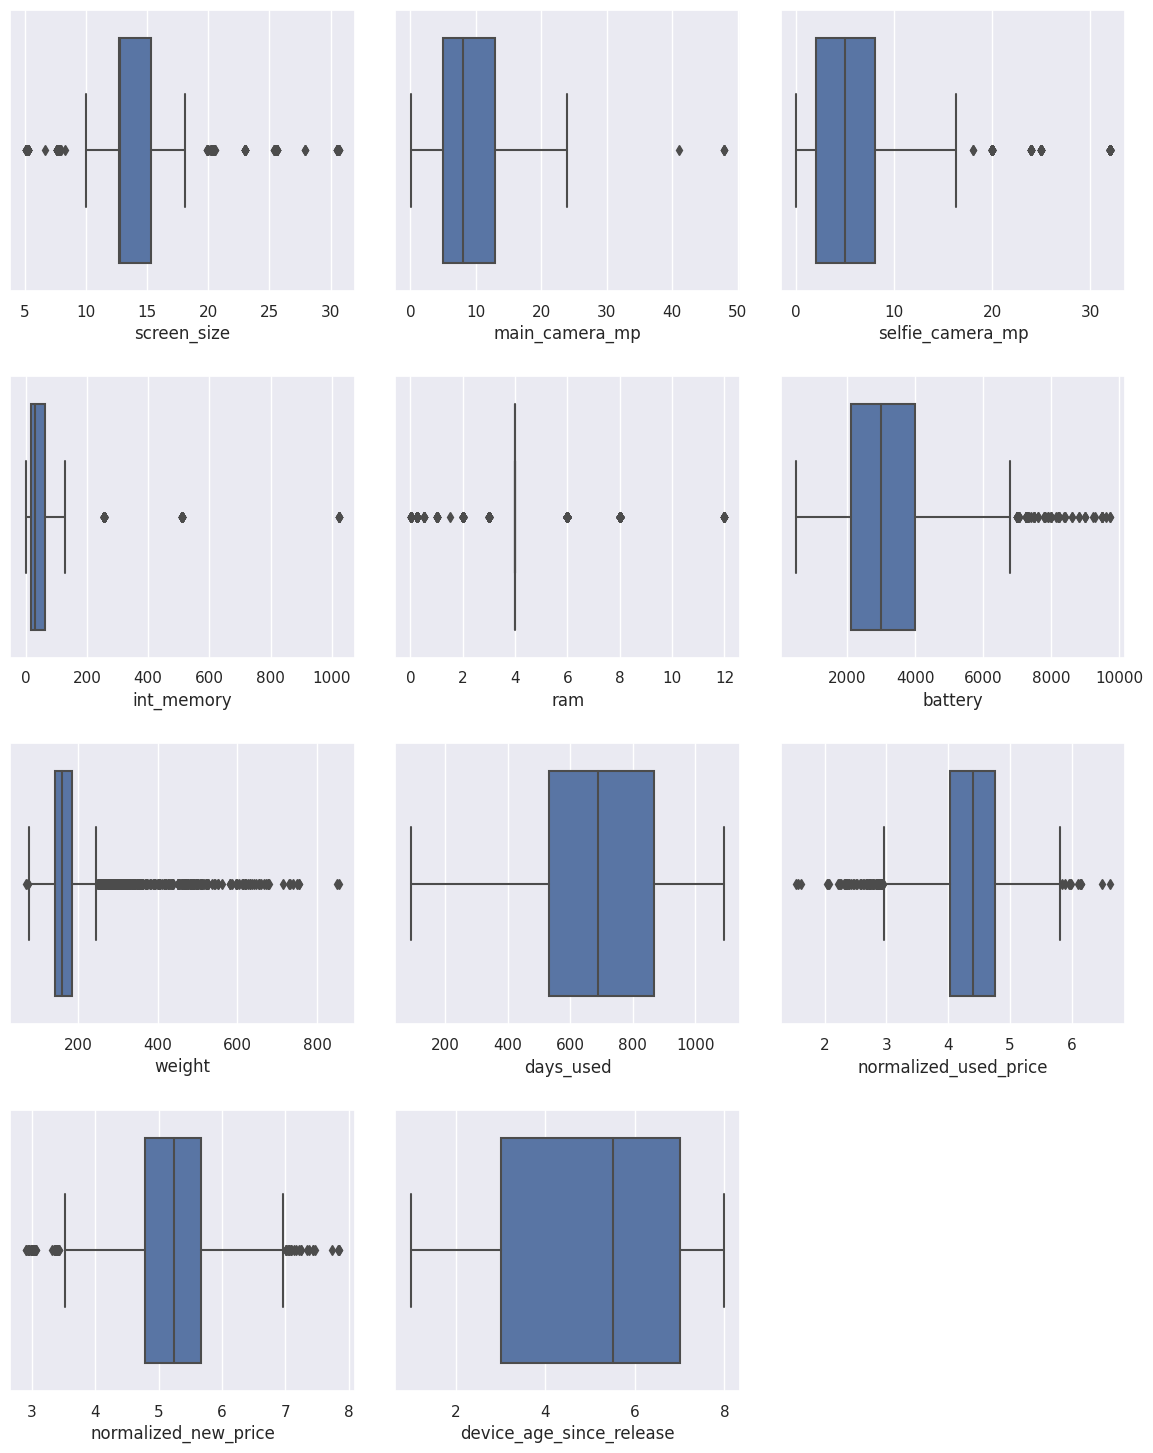

In [85]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

#### **Observations**
- There are few outliers in the used device data. However as they are proper values and they are not very extreme values, outliers treatment is not needed.

### EDA Check after manipulation of data

- It is a good idea to explore the data once again after manipulating it. Lets check the distribution of the variables that have been imputed for the missing values and also the distribution of the newly added column 'device_age_since_release' inorder to check there isn't any major change in the distribution before proceeding further.

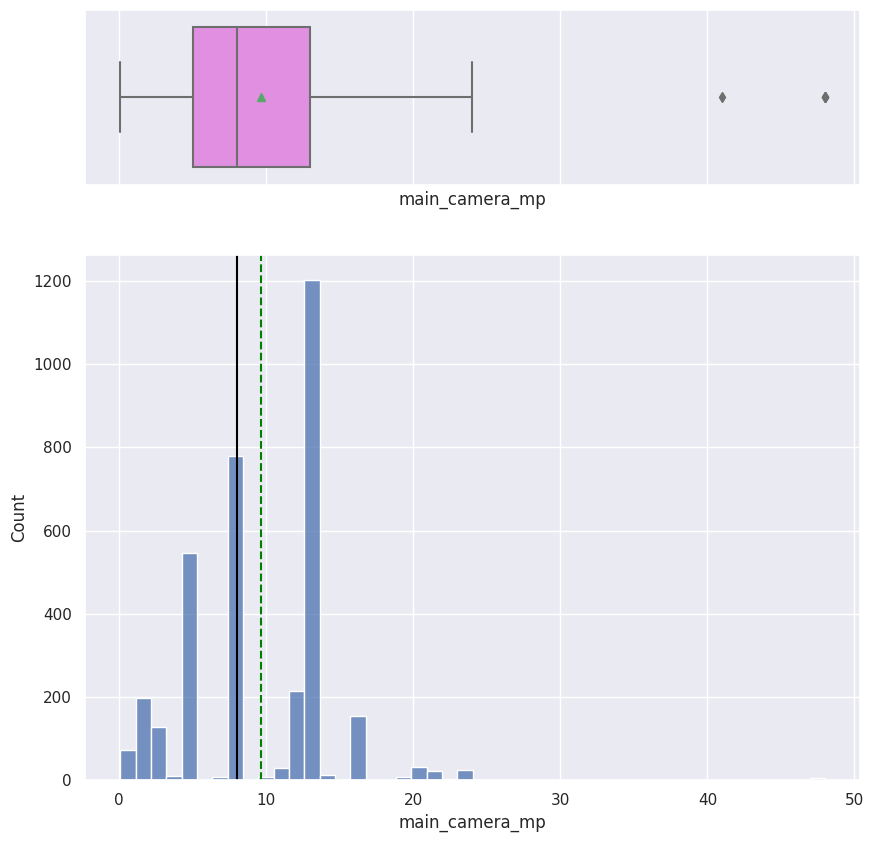

In [86]:
histogram_boxplot(df1, "main_camera_mp")

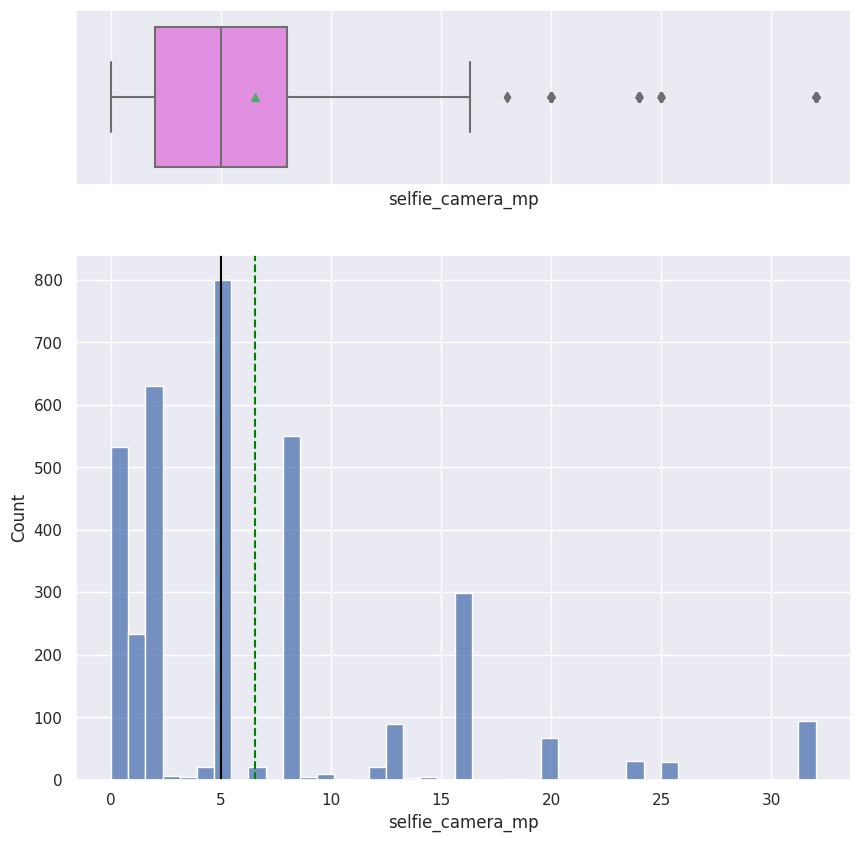

In [87]:
histogram_boxplot(df1, "selfie_camera_mp")

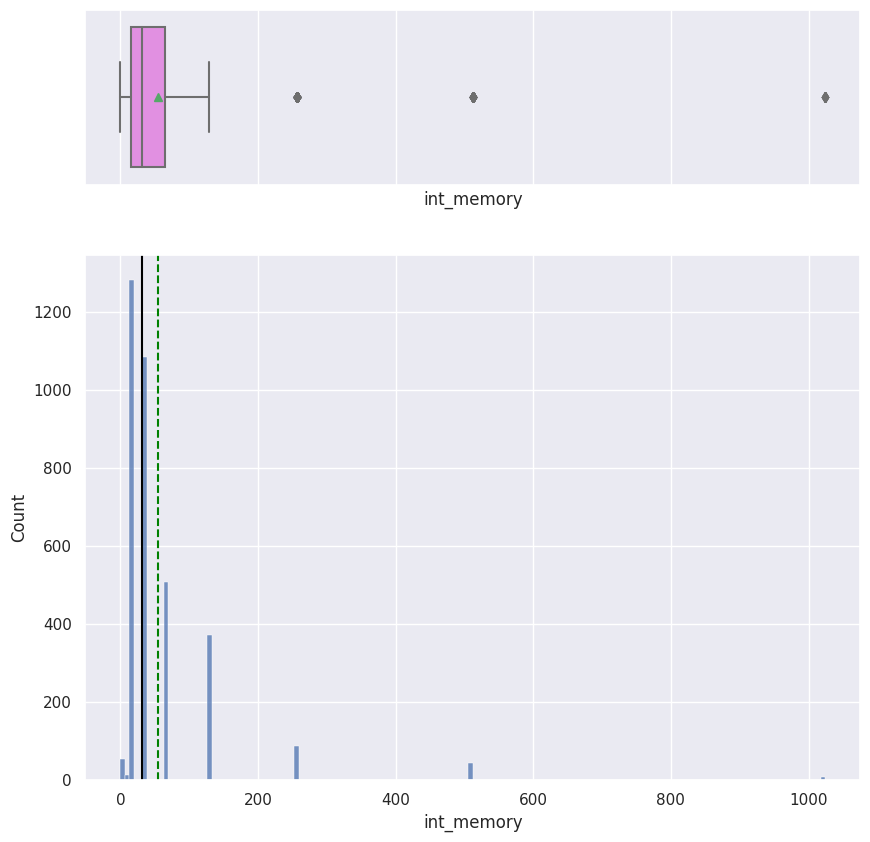

In [88]:
histogram_boxplot(df1, "int_memory")

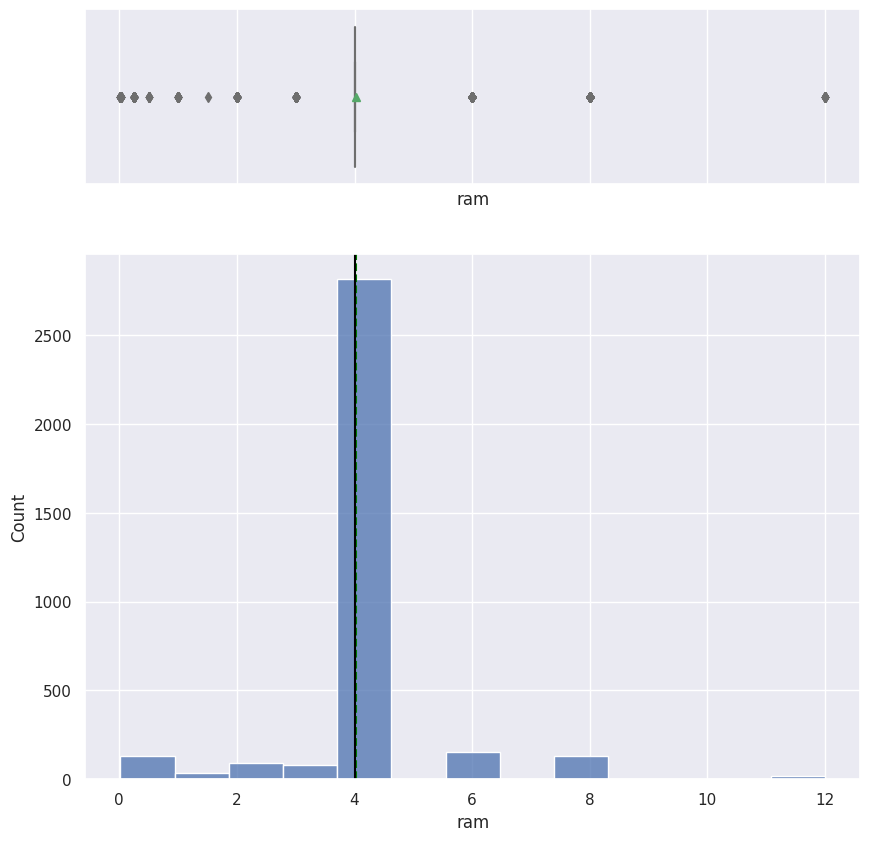

In [89]:
histogram_boxplot(df1, "ram")

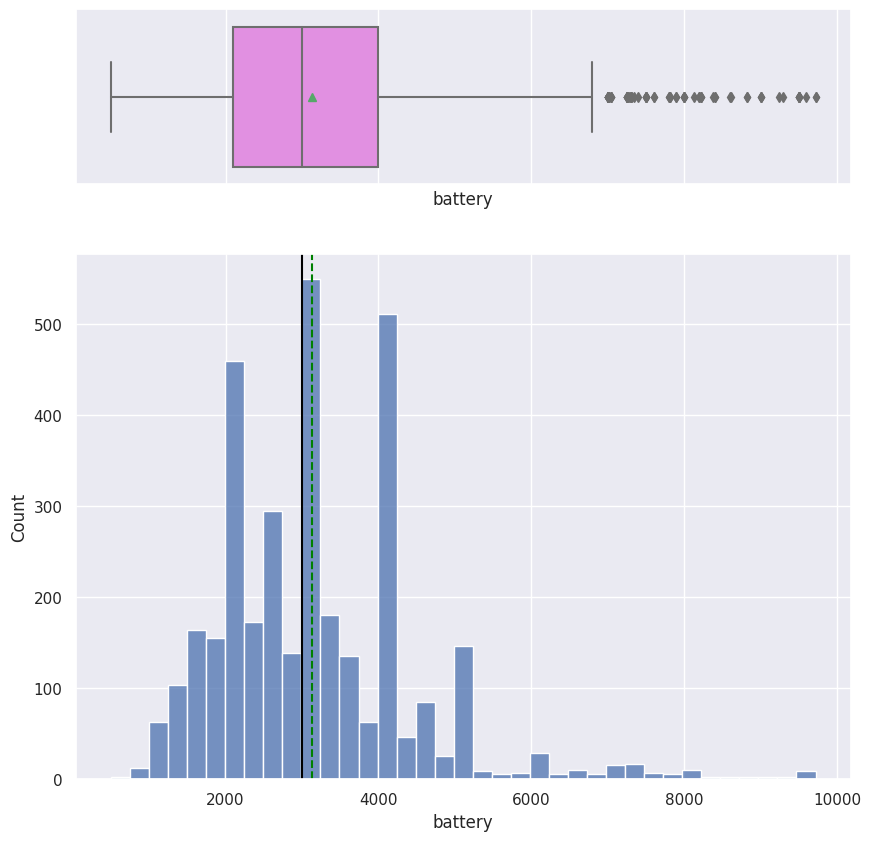

In [90]:
histogram_boxplot(df1, "battery")

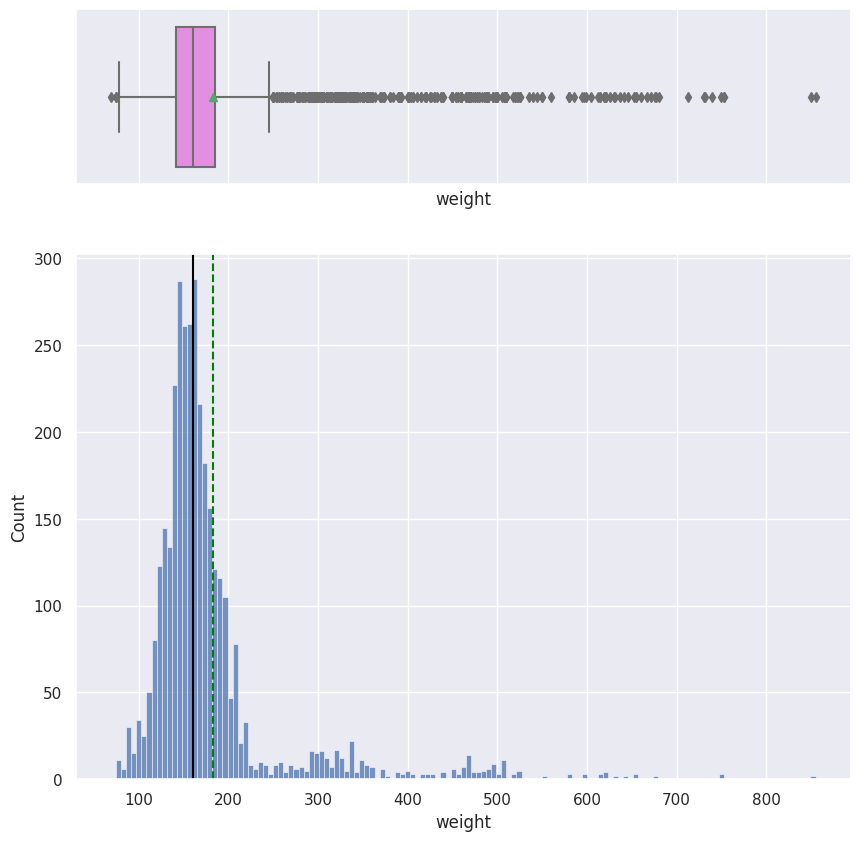

In [91]:
histogram_boxplot(df1, "weight")

##### **Observations**

The distribution of the variables main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight have not been changed after the imputation of missing values.

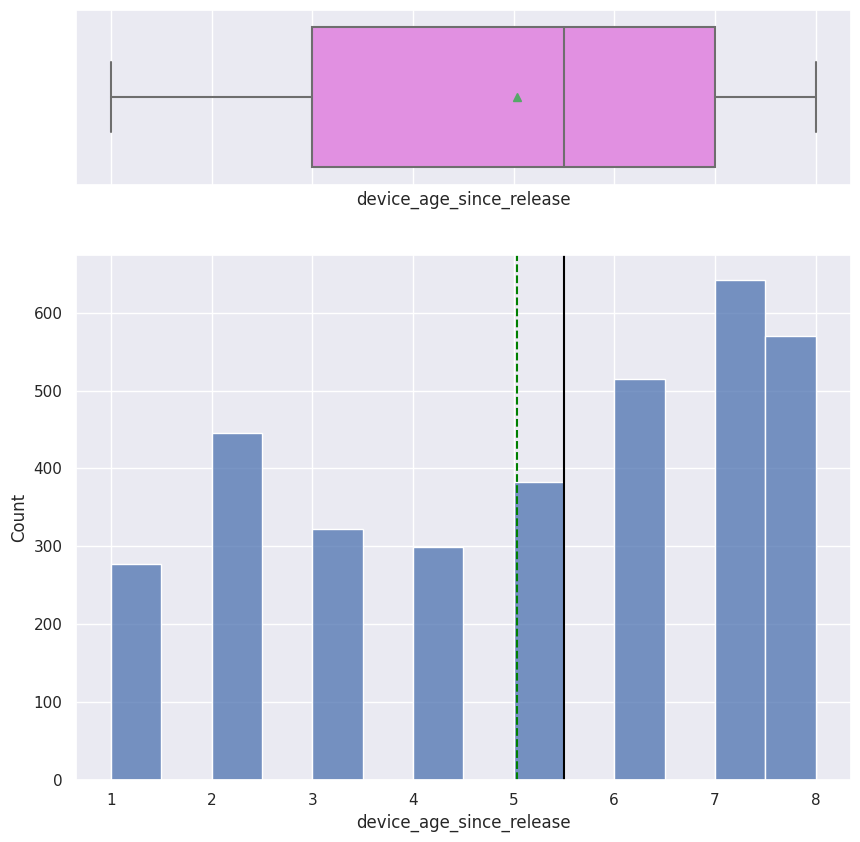

In [93]:
histogram_boxplot(df1, "device_age_since_release")

##### **Observations**


*   The mean number of years since the used device has been released is 5 years. There are about 380 devices which are 5 years old.
*   Around 650 devices have been released in the year 2014 and these are 7 years old.



### Data Preparation for Modeling

- We want to predict the normalized price of the used device and identify factors that significantly influence it.
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [94]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  device_age_since_release  
0              4.715100                         1  
1              5.519018                         1  
2              5.884631                         1 

In [95]:
# let's add the intercept to data
X = sm.add_constant(X)

In [96]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [97]:
X.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'device_age_since_release',
       'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus',
       'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad',
       'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC',
       'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Infinix',
       'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava',
       'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax',
       'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
       'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others',
       'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung',
       'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo',
       'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others',
       'os_Windows', 'os_iOS', '4g

In [98]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [99]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

Lets build a linear regression model usig OLS function of the stats model.

In [100]:
# Build a linear regression model with the training data
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           17:07:33   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

#### **Obervations - Regression results**

1. **Adjusted. R-squared**:

 - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
 - In the generated linear regression model, the value for adj. R-squared is **0.842**, which is good.

2. ***const* coefficient( The Y-intercept)**:

 - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
 - In the generated linear regression model, the value for 'const' coefficient is **1.3156**

3. **Coefficient of a predictor variable**: It represents the change in the output Y (normalized_used_price) due to a change in the predictor variable (everything else held constant).
 - In the generated linear regression model, the coefficient of 'screen_size' is **0.0244** which means for every unit year increase in screen size the unit of normalized used price will increase by 0.0244.
 - In the generated linear regression model, the coefficient of 'device_age_since_release' is **-0.0237** which means for every unit year increase since the device was released the unit of normalized used price will decrease by 0.0237.



## Model Performance Check

Let's check the performance of the model using different metrics.

* Use metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* Define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* Create a function which will print out all the above metrics.

In [101]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [102]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [103]:
# checking model performance on test set (seen 30% data)
print("Testing Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting.

- The inference from MAE is that the model can predict normalized used price of the devices within a mean error of 0.184 on the test data.

- The inference from MAPE of 4.5 on the test data is that we are able to predict the normalized uzed price of the devices within 4.5% of error.

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

The following Linear Regression assumptions needs to be checked:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test for Multicollinearity

Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is an issue because predictor/Independent variables should be independent.

There are different ways of detecting multicollinearity such as correlation matrix, Variance Inflation factor(VIF) etc. Lets use the VIF to detect multticollinearity.

**General Rule of thumb:**
- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.

Lets define a function to check the VIF.

In [104]:
# import variance_inflation_factor function from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [105]:
# call the defined function with the train set predictors.
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* There are many columns with very high VIF values, indicating strong multicollinearity between Predictor variables.
* We will drop numerical columns with VIF > 5.
* We will ignore the VIF values for dummy variables and the constant (intercept).

### Removing Multicollinearity

To remove multicollinearity lets perform the following steps.

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till we get all VIF scores under 5.

Let's define a function to do this.

In [106]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [107]:
# Create a list with high VIF columns
col_list = ["screen_size", "weight"]
# call the defined multicollinearity function and store the returned values in the variable
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


From the above obtained result, the adj. R- Squared value doesnt drop much from the original model. Hence lets try to drop the column screen_size and check VIF again.

In [108]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF again
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,device_age_since_release,4.730315


We have addressed the multicollinearity issue and removed the column 'screen_size'. The VIF values of all the numerical columns are below 5. Lets rerun the model.

In [109]:
# Get the best fit linear regression model using OLS function
olsmodel1 = sm.OLS(y_train, x_train2).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           17:08:36   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

**Observations**

- The adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped column 'screen_size' did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dealing with high P-value variables

There are variables in the data having p-value > 0.05. So, they are not significant and hence lets drop them.

Sometimes p-values change after dropping a variable. Hence we will perform the following steps:
- Build a model, check the p-values of the variables, and drop the column with the highest p-value.
- Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
- Repeat the above two steps till there are no columns with p-value > 0.05


In [110]:
# Get the best fit linear regression model using OLS function
olsmodel1 = sm.OLS(y_train, x_train2).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           17:08:44   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [111]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'device_age_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [112]:
# create new training and testing datset with the selected predictors
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [113]:
# Rerun the model again with the selected features of the training set
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           17:08:59   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [114]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [115]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

* After performing the above functionality of checking and removing columns with high p-value, no feature has p-value greater than 0.05.
* The adjusted R-squared in olsmodel2 is 0.838, i.e., our model is able to explain ~84% of the variance which did not change after dropping the high p-values. Hence the variables we dropped were not affecting the model.
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

**Lets check the rest of the assumptions on olsmodel2**

*   Linearity of variables
*   Independence of error terms
*   Normality of error terms
*   No Heteroscedasticity





### Test for Linearity and Independence

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

The independence of the residuals is important. We will test the assumption for linearity and independence using the following steps.

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [116]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


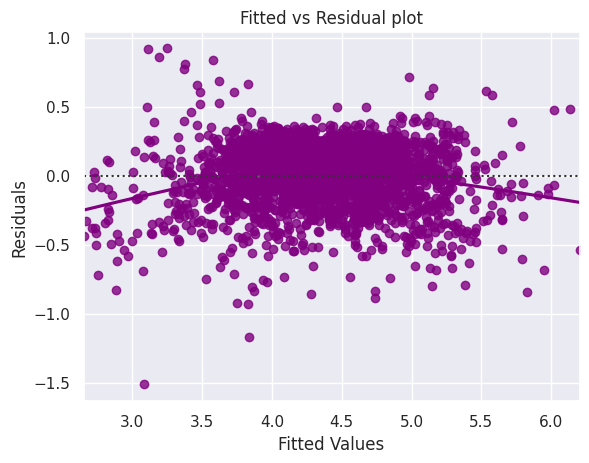

In [117]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

**We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### Test for Normality

The residuals/Error should be normally distributed.

We will test the assumption for normality using the following tests.
1. Checking the distribution of residuals.
2. Checking the Q-Q plot of residuals.
 - If the distribution of the residuals follow a normal distribution, they will make a straight line plot.
3. Using the Shapiro-Wilk test.
 - Null hypothesis: Residuals are normally distributed
 - Alternate hypothesis: Residuals are not normally distributed

  If the p-value of the Shapiro-Wilk test is greater than 0.05, we can conclude that the residuals are normally distributed.

**Check the distribution of Residuals**

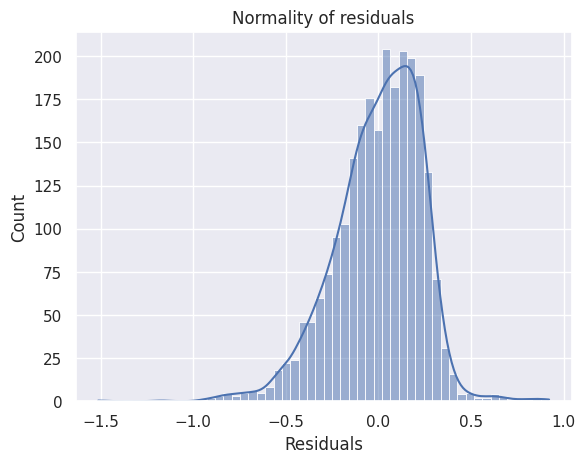

In [118]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

The histogram of the residuals is a bell shaped curve infering a normal distribution.

**Check the Q-Q plot**

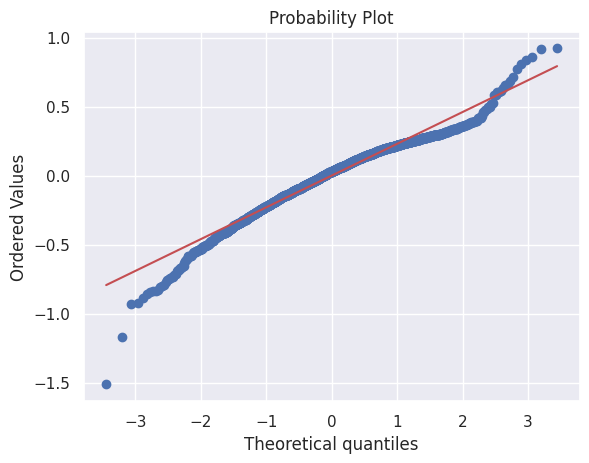

In [119]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

The residuals approximately follow a straight line except for the tails.


**Perform the Shapiro-Wilks test**

In [120]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. Hence as per the test the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal as the observations from the histogram and the Q-Q plot shows the residuals are close to normally distributed.

**Hence the assumption of Normality is satisfied.**

### Test for Homoscedasticity

The goldfeldquandt test can be used to check the assumption of Homoscedasticity. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
 - Null hypothesis: Residuals are homoscedastic
 - Alternate hypothesis: Residuals have heteroscedasticity

In [121]:
# Test Homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

**Since p-value > 0.05, we can conclude that the residuals are homoscedastic. Hence the assumption of Homoscedasticity is satisfied.**

## Predictions on test data

We have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [122]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


**Observations**

The model has returned pretty good prediction results, and the actual and predicted values are comparable.

## Final Model

Lets create the final model and print the summary.

In [123]:
# create final training and testing dataset
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [124]:
# create the final OLS model
olsmodel_final = sm.OLS(y_train,x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           17:10:00   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [127]:
# Framing the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train_final.columns[i], ")")

normalized_used_price = 1.4999812451972678 + 0.020967228790752777 * ( main_camera_mp ) +  0.013827288876828842 * ( selfie_camera_mp ) +  0.02071270165714738 * ( ram ) +  0.0016616476692227972 * ( weight ) +  0.4414723002236377 * ( normalized_new_price ) +  -0.02916976367153913 * ( device_age_since_release ) +  0.11559844506476558 * ( brand_name_Karbonn ) +  -0.03742329934072872 * ( brand_name_Samsung ) +  -0.06699285130111633 * ( brand_name_Sony ) +  0.08006840695804293 * ( brand_name_Xiaomi ) +  -0.1275751256189785 * ( os_Others ) +  -0.09000552317649085 * ( os_iOS ) +  0.050213451529782495 * ( 4g_yes ) +  -0.06725868426972234 * ( 5g_yes )


In [125]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [126]:
# checking model performance on test set (seen 30% data)
print("Testing Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

* The model is able to explain ~84% of the variation in the used device data.

* The train and test RMSE and MAE are low and comparable. Hence the model we built is not suffering from overfitting.

* The MAPE on the test set suggests we can predict the normalized used device price within 4.5%.

* Hence, we can conclude the model we built, **olsmodel_final** is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

**Insights**

- The genearted linear regression model is able to explain ~84% of the variation in the used device data and within 4.5% of the normalized used price of the devices on the test data, which is really good. Hence the model is good for prediction as well as inference purposes.

- The normalized used price increases by 0.0207 units for every unit increase of ram given all the other variables are held constant.

- If the selfie camera megapixels increases by one unit, then the normalized used price of the devices increases by 0.0138 units given all the other variables are held constant.

- If the weight of the used devices increases by one unit, then the normalized used price of the devices increases by 0.0017 units given all the other variables are held constant.

- For every unit increase in year since the device was released, the normalized used price decreases by 0.0292 units given all the other variables are held constant.

- If the normalized new price of the devices of the same model of the used device increases by one unit, then the noramlized used price of the devices increases by 0.4415 units given all the other variables are held constant.

- The Karbonn brand devices increases the normalized used price by 0.1156 units given all the other variables are held constant.

- The normalized used price for the devices of brands Samsung and Sony decreases by 0.0374 and 0.0670 units respectively considering all the other variables are constant.

- The normalized used price of the devices running on OS other than windows, Andriod and ios gets decreased by 0.1276 units for every unit increase in the os considering that all the other variables are held constant.

- If the used device is running on ios, then for every unit increase in the OS the normalized used price decreases by 0.09 units given all the other variables are held constant.

- The normalized used price increases by 0.05 units if the used device has 4g data avaialbility.

**Business Recommendations**

- The ReCell can consider procuring more used devices with large ram capacity in their online portal inorder to yield profit as the normalized used price of the devices increases with increase in the ram capacity.

- Since the customers buying used devices has preferences on the resolution of the selfie camera and main camera, the ReCell can focus on selling used devices having more than 8mp selfie camera and more than 16mp main camera resolution to run the business in the successful path as well as to build customer satisfaction.

- The ReCell business team has to consider the factor of 4g data availability while procuring and selling the used devices as the normalized used price increases when 4g data is available in the devices.
  
- The ReCell needs to consider the age of the phone they are selling as the phones becomes older the normalized used price goes down. Hence the ReCell company can have more inventory of phones not more than 5 years old.


___